In [1]:
import pandas as pd
import numpy as np
import warnings
import platform
import datetime
import re

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# 시각화 설정
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rc('axes', unicode_minus=False)

# 데이터 분할 및 전처리
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 회귀 모델 및 변수 선택
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 분류 및 회귀 모델
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    RandomForestRegressor,
    GradientBoostingRegressor
)

# 평가 지표
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score
)

# 통계 검정
from scipy.stats import shapiro, ttest_ind, chi2_contingency

# 나무 시각화
# import graphviz

In [2]:
# 출력 제한 해제
pd.set_option('display.max_rows', None)     # 행 모두 보기
pd.set_option('display.max_columns', None)  # 열 모두 보기
pd.set_option('display.width', None)        # 가로 너비 무제한
pd.set_option('display.max_colwidth', None) # 컬럼 내용 모두 출력

In [3]:
# 데이터 불러오기
dfloan_train = pd.read_csv('/Users/minjoo/PoscoBAA/BigData/BigData_Project/C3_할부금융/auto_loan_train.csv', encoding='euc-kr')
dfc_train = pd.read_csv('/Users/minjoo/PoscoBAA/BigData/BigData_Project/C3_할부금융/auto_customer_train.csv', encoding='euc-kr')
dfloan_test = pd.read_csv('/Users/minjoo/PoscoBAA/BigData/BigData_Project/C3_할부금융/auto_loan_test.csv', encoding='euc-kr')
dfc_test = pd.read_csv('/Users/minjoo/PoscoBAA/BigData/BigData_Project/C3_할부금융/auto_customer_test.csv', encoding='euc-kr')

# 데이터 전처리
- 1) 결측치 처리
- 2) 이상치 처리

In [4]:
df = pd.merge(dfc_train, dfloan_train, how='inner',on='CustomerId')
df = df.drop(['CustomerId','LoanId','HouseAge'], axis = 1)

- CustomerId, LoanId : 분석과 관련 없는 열 제거
- HouseAge : 결측치가 너무 많아 제거 (42871개)

In [5]:
df.describe()

,Age,FamilyCount,ChildCount,EmployedYears,Default,ApplHour,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestRate,LoanAmount,InstallAmount,LoanRemainAmount,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears,ScoreA,ScoreB,ScoreC
count,64464.000000,64464.000000,64464.000000,53309.000000,64464.000000,64464.000000,6.446400e+04,64464.000000,64464.000000,64464.00000,64464.000000,6.446400e+04,6.446400e+04,6.446400e+04,64464.000000,63801.000000,64464.000000,63754.000000,33952.000000,63096.000000,57967.000000
mean,43.455536,2.621339,0.991468,3.663728,0.075825,13.201601,3.217439e+07,17.471302,31.005957,14.77738,4.815046,2.658923e+07,1.171669e+06,1.362301e+07,1.737109,7.711175,12.966322,2.636956,0.633674,0.617223,0.620273
std,10.238846,1.147452,0.930944,5.550315,0.264720,2.741035,1.460303e+07,9.219159,12.429224,10.15255,1.097683,1.269872e+07,1.005010e+06,9.879684e+06,1.845984,4.315850,9.520182,2.228362,0.192594,0.206245,0.206315
min,23.000000,1.000000,0.000000,-2.800000,0.000000,9.000000,1.500000e+07,0.000000,12.000000,1.00000,2.000000,1.050000e+07,2.234094e+05,3.970167e+05,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000
25%,35.100000,2.000000,0.000000,-0.500000,0.000000,11.000000,2.000000e+07,10.000000,24.000000,7.00000,4.300000,1.620000e+07,5.194827e+05,6.453562e+06,0.000000,4.100000,4.700000,0.700000,0.521000,0.505000,0.494000
50%,42.700000,3.000000,1.000000,2.000000,0.000000,13.000000,3.000000e+07,20.000000,36.000000,12.00000,4.430000,2.250000e+07,7.919275e+05,1.113493e+07,1.000000,8.400000,11.900000,2.100000,0.663000,0.643000,0.648000
75%,51.800000,3.000000,2.000000,6.200000,0.000000,15.000000,4.300000e+07,20.000000,36.000000,19.00000,5.380000,3.850000e+07,1.333750e+06,1.825250e+07,3.000000,11.600000,19.800000,4.400000,0.778000,0.742000,0.766000
max,69.000000,5.000000,3.000000,24.600000,1.000000,19.000000,6.100000e+07,30.000000,48.000000,44.00000,7.430000,5.500000e+07,4.917917e+06,4.917917e+07,22.000000,15.000000,58.200000,8.600000,0.999000,0.999000,0.999000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64464 entries, 0 to 64463
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             64464 non-null  object 
 1   Age                64464 non-null  float64
 2   Education          64464 non-null  object 
 3   MaritalStatus      64464 non-null  object 
 4   FamilyCount        64464 non-null  int64  
 5   ChildCount         64464 non-null  int64  
 6   IncomeType         64464 non-null  object 
 7   IncomeClass        64464 non-null  object 
 8   Occupation         64464 non-null  object 
 9   OrgType            64464 non-null  object 
 10  EmployedYears      53309 non-null  float64
 11  HouseOwnYN         64464 non-null  object 
 12  DwellingType       64464 non-null  object 
 13  HousingType        64464 non-null  object 
 14  ResidenceClass     64464 non-null  object 
 15  CarOwnedYN         64464 non-null  object 
 16  Default            644

### 파생변수 생성

- 가입일 계산
    - loan_months : 대출 시작 후 경과된 개월 수
    - loan_start_date : 기준일(2025-04-01)로 계산한 대출 시작일

In [7]:
# Calculate loan start date
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Reference date (April 1, 2025)
base_date = datetime(2025, 4, 1)

# Calculate how many months have passed since loan started
df['loan_months'] = df['LoanTerm'] - df['LoanRemainTerm']

# Calculate the loan start date
df['loan_start_date'] = df['loan_months'].apply(lambda x: base_date - relativedelta(months=x))

# Preview result
print(df[['LoanTerm', 'LoanRemainTerm', 'loan_months', 'loan_start_date']].head())


   LoanTerm  LoanRemainTerm  loan_months loan_start_date
0        24              11           13      2024-03-01
1        36              10           26      2023-02-01
2        24              14           10      2024-06-01
3        36               1           35      2022-05-01
4        24              12           12      2024-04-01


## 퇴직자 / 재직자 구분

In [8]:
# 퇴직자 재직자
# 1. 퇴직자
df_retired = df[(df['IncomeType'] == '퇴직')]

# 2. 재직자
df_emp = df[(df['IncomeType'] != '퇴직')]

In [9]:
# 퇴직자 데이터 확인
df_retired.head()

,Gender,Age,Education,MaritalStatus,FamilyCount,ChildCount,IncomeType,IncomeClass,Occupation,OrgType,EmployedYears,HouseOwnYN,DwellingType,HousingType,ResidenceClass,CarOwnedYN,Default,ActiveLoanYN,LoanType,ApplWeek,ApplHour,Accompany,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestType,InterestRate,LoanAmount,InstallAmount,LoanRemainAmount,HomeAddMatchedYN,WorkAddMatchedYN,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears,ScoreA,ScoreB,ScoreC,loan_months,loan_start_date
1329,남성,43.1,대학교,결혼,3,1,퇴직,3000만원 미만,기타,공공,NaN,Y,자가,아파트,평균,Y,0,Y,할부금융(장/단기),금,17,배우,30000000,20,12,10,변동,6.70,24000000,2134000.0,21340000.0,Y,Y,3,0.0,15.2,4.7,0.749,0.609,0.609,2,2025-02-01
1357,남성,43.4,대학교,독신,4,3,퇴직,3000만원~5000만원 미만,기타,공공,NaN,Y,자가,아파트,양호,N,0,Y,할부금융(장/단기),수,16,단독,43000000,20,36,19,변동,6.19,34400000,1014704.4,19279383.6,Y,Y,0,2.4,4.6,0.0,0.644,0.504,NaN,17,2023-11-01
1429,남성,44.2,대학원,결혼,3,1,퇴직,3000만원~5000만원 미만,기타,산업,NaN,Y,자가,연립/다세대/빌라,양호,Y,0,Y,할부금융(장/단기),화,10,단독,25000000,10,24,17,변동,6.10,22500000,994687.5,16909687.5,Y,Y,0,11.9,23.5,5.8,0.692,0.672,NaN,7,2024-09-01
1472,여성,44.7,고등학교,결혼,5,3,퇴직,5000만원~1억원 미만,기타,운송,NaN,Y,자가,오피스텔,양호,Y,0,Y,할부금융(장/단기),화,17,단독,61000000,30,48,2,변동,4.43,42700000,928991.9,1857983.8,Y,Y,2,7.2,13.4,5.0,NaN,0.732,0.892,46,2021-06-01
1519,남성,45.3,고등학교,결혼,5,3,퇴직,5000만원~1억원 미만,기타,산업,NaN,Y,자가,아파트,누락,N,0,Y,할부금융(장/단기),월,11,단독,15000000,30,48,37,변동,4.43,10500000,228440.6,8452302.2,Y,Y,1,0.3,4.7,2.4,NaN,0.991,0.780,11,2024-05-01


In [10]:
# 퇴직자 데이터 인덱스 확인
df_retired.reset_index(drop=True, inplace=True)
df_retired.index = df_retired.index

In [11]:
df_retired.head()

,Gender,Age,Education,MaritalStatus,FamilyCount,ChildCount,IncomeType,IncomeClass,Occupation,OrgType,EmployedYears,HouseOwnYN,DwellingType,HousingType,ResidenceClass,CarOwnedYN,Default,ActiveLoanYN,LoanType,ApplWeek,ApplHour,Accompany,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestType,InterestRate,LoanAmount,InstallAmount,LoanRemainAmount,HomeAddMatchedYN,WorkAddMatchedYN,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears,ScoreA,ScoreB,ScoreC,loan_months,loan_start_date
0,남성,43.1,대학교,결혼,3,1,퇴직,3000만원 미만,기타,공공,NaN,Y,자가,아파트,평균,Y,0,Y,할부금융(장/단기),금,17,배우,30000000,20,12,10,변동,6.70,24000000,2134000.0,21340000.0,Y,Y,3,0.0,15.2,4.7,0.749,0.609,0.609,2,2025-02-01
1,남성,43.4,대학교,독신,4,3,퇴직,3000만원~5000만원 미만,기타,공공,NaN,Y,자가,아파트,양호,N,0,Y,할부금융(장/단기),수,16,단독,43000000,20,36,19,변동,6.19,34400000,1014704.4,19279383.6,Y,Y,0,2.4,4.6,0.0,0.644,0.504,NaN,17,2023-11-01
2,남성,44.2,대학원,결혼,3,1,퇴직,3000만원~5000만원 미만,기타,산업,NaN,Y,자가,연립/다세대/빌라,양호,Y,0,Y,할부금융(장/단기),화,10,단독,25000000,10,24,17,변동,6.10,22500000,994687.5,16909687.5,Y,Y,0,11.9,23.5,5.8,0.692,0.672,NaN,7,2024-09-01
3,여성,44.7,고등학교,결혼,5,3,퇴직,5000만원~1억원 미만,기타,운송,NaN,Y,자가,오피스텔,양호,Y,0,Y,할부금융(장/단기),화,17,단독,61000000,30,48,2,변동,4.43,42700000,928991.9,1857983.8,Y,Y,2,7.2,13.4,5.0,NaN,0.732,0.892,46,2021-06-01
4,남성,45.3,고등학교,결혼,5,3,퇴직,5000만원~1억원 미만,기타,산업,NaN,Y,자가,아파트,누락,N,0,Y,할부금융(장/단기),월,11,단독,15000000,30,48,37,변동,4.43,10500000,228440.6,8452302.2,Y,Y,1,0.3,4.7,2.4,NaN,0.991,0.780,11,2024-05-01


In [12]:
# 재직자 데이터 확인
df_emp.head()

,Gender,Age,Education,MaritalStatus,FamilyCount,ChildCount,IncomeType,IncomeClass,Occupation,OrgType,EmployedYears,HouseOwnYN,DwellingType,HousingType,ResidenceClass,CarOwnedYN,Default,ActiveLoanYN,LoanType,ApplWeek,ApplHour,Accompany,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestType,InterestRate,LoanAmount,InstallAmount,LoanRemainAmount,HomeAddMatchedYN,WorkAddMatchedYN,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears,ScoreA,ScoreB,ScoreC,loan_months,loan_start_date
0,남성,23.0,고등학교,독신,1,0,서비스,3000만원 미만,노동,자영업,NaN,Y,정보누락,단독주택,양호,N,0,N,오토론,목,11,단독,43000000,10,24,11,변동,6.70,38700000,1720537.5,18925912.5,Y,Y,1,2.6,11.2,1.0,0.416,0.496,0.256,13,2024-03-01
1,남성,23.1,대학원,독신,1,0,서비스,3000만원 미만,매니저,기타,-2.4,Y,자가,연립/다세대/빌라,평균,N,0,Y,할부금융(장/단기),월,10,단독,25000000,30,36,10,혼합,4.54,17500000,508180.6,5081806.0,Y,Y,0,2.5,5.4,2.1,0.550,0.490,NaN,26,2023-02-01
2,남성,23.3,고등학교,독신,1,0,서비스,3000만원~5000만원 미만,기타,자영업,0.5,Y,자가,아파트,양호,N,0,N,할부금융(장/단기),금,16,단독,15000000,10,24,14,변동,4.30,13500000,586687.5,8213625.0,Y,Y,0,0.4,22.1,0.0,NaN,0.339,0.539,10,2024-06-01
3,남성,23.5,고등학교,독신,1,0,서비스,3000만원 미만,영업,자영업,-1.5,N,전세,아파트,양호,N,1,Y,할부금융(장/단기),화,12,단독,20000000,20,36,1,고정,6.49,16000000,473288.9,473288.9,Y,Y,7,1.9,8.9,0.3,NaN,0.281,0.141,35,2022-05-01
4,여성,23.5,전문대,독신,1,0,사업,3000만원 미만,영업,통신,-1.0,N,반전세,아파트,양호,N,1,N,할부금융(장/단기),목,17,단독,30000000,10,24,12,변동,5.10,27000000,1182375.0,14188500.0,N,Y,0,3.4,19.8,0.0,NaN,0.421,0.141,12,2024-04-01


In [13]:
# 재직자 데이터 인덱스 확인
df_emp.reset_index(drop=True, inplace=True)
df_emp.index = df_emp.index

In [14]:
df_emp.head()

,Gender,Age,Education,MaritalStatus,FamilyCount,ChildCount,IncomeType,IncomeClass,Occupation,OrgType,EmployedYears,HouseOwnYN,DwellingType,HousingType,ResidenceClass,CarOwnedYN,Default,ActiveLoanYN,LoanType,ApplWeek,ApplHour,Accompany,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestType,InterestRate,LoanAmount,InstallAmount,LoanRemainAmount,HomeAddMatchedYN,WorkAddMatchedYN,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears,ScoreA,ScoreB,ScoreC,loan_months,loan_start_date
0,남성,23.0,고등학교,독신,1,0,서비스,3000만원 미만,노동,자영업,NaN,Y,정보누락,단독주택,양호,N,0,N,오토론,목,11,단독,43000000,10,24,11,변동,6.70,38700000,1720537.5,18925912.5,Y,Y,1,2.6,11.2,1.0,0.416,0.496,0.256,13,2024-03-01
1,남성,23.1,대학원,독신,1,0,서비스,3000만원 미만,매니저,기타,-2.4,Y,자가,연립/다세대/빌라,평균,N,0,Y,할부금융(장/단기),월,10,단독,25000000,30,36,10,혼합,4.54,17500000,508180.6,5081806.0,Y,Y,0,2.5,5.4,2.1,0.550,0.490,NaN,26,2023-02-01
2,남성,23.3,고등학교,독신,1,0,서비스,3000만원~5000만원 미만,기타,자영업,0.5,Y,자가,아파트,양호,N,0,N,할부금융(장/단기),금,16,단독,15000000,10,24,14,변동,4.30,13500000,586687.5,8213625.0,Y,Y,0,0.4,22.1,0.0,NaN,0.339,0.539,10,2024-06-01
3,남성,23.5,고등학교,독신,1,0,서비스,3000만원 미만,영업,자영업,-1.5,N,전세,아파트,양호,N,1,Y,할부금융(장/단기),화,12,단독,20000000,20,36,1,고정,6.49,16000000,473288.9,473288.9,Y,Y,7,1.9,8.9,0.3,NaN,0.281,0.141,35,2022-05-01
4,여성,23.5,전문대,독신,1,0,사업,3000만원 미만,영업,통신,-1.0,N,반전세,아파트,양호,N,1,N,할부금융(장/단기),목,17,단독,30000000,10,24,12,변동,5.10,27000000,1182375.0,14188500.0,N,Y,0,3.4,19.8,0.0,NaN,0.421,0.141,12,2024-04-01


In [15]:
df_retired.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8185 entries, 0 to 8184
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Gender             8185 non-null   object        
 1   Age                8185 non-null   float64       
 2   Education          8185 non-null   object        
 3   MaritalStatus      8185 non-null   object        
 4   FamilyCount        8185 non-null   int64         
 5   ChildCount         8185 non-null   int64         
 6   IncomeType         8185 non-null   object        
 7   IncomeClass        8185 non-null   object        
 8   Occupation         8185 non-null   object        
 9   OrgType            8185 non-null   object        
 10  EmployedYears      1 non-null      float64       
 11  HouseOwnYN         8185 non-null   object        
 12  DwellingType       8185 non-null   object        
 13  HousingType        8185 non-null   object        
 14  Residenc

## 1) 결측치 제거

- 정보누락 / 누락 데이터 먼저 제거
- EmployedYears 변수
    - 퇴직자는 변수제거
    - 재직자는 음수값 제거

#### 퇴직자

In [16]:
# 결측치 확인
df_retired.isnull().sum()

Gender                  0
Age                     0
Education               0
MaritalStatus           0
FamilyCount             0
ChildCount              0
IncomeType              0
IncomeClass             0
Occupation              0
OrgType                 0
EmployedYears        8184
HouseOwnYN              0
DwellingType            0
HousingType             0
ResidenceClass          0
CarOwnedYN              0
Default                 0
ActiveLoanYN            0
LoanType                0
ApplWeek                0
ApplHour                0
Accompany               0
CarPrice                0
Deposit                 0
LoanTerm                0
LoanRemainTerm          0
InterestType            0
InterestRate            0
LoanAmount              0
InstallAmount           0
LoanRemainAmount        0
HomeAddMatchedYN        0
WorkAddMatchedYN        0
InquiryCount            0
IdChangedYears         42
InfoChangedYears        0
PhoneChangedYears      85
ScoreA               5627
ScoreB      

In [17]:
df_retired = df_retired[df_retired['IncomeClass'] != '누락']
df_retired = df_retired[df_retired['ResidenceClass'] != '누락']
df_retired = df_retired[df_retired['DwellingType'] != '정보누락']

In [18]:
df_retired = df_retired.drop(columns=['EmployedYears'])

In [19]:
df_retired.isnull().sum()

Gender                  0
Age                     0
Education               0
MaritalStatus           0
FamilyCount             0
ChildCount              0
IncomeType              0
IncomeClass             0
Occupation              0
OrgType                 0
HouseOwnYN              0
DwellingType            0
HousingType             0
ResidenceClass          0
CarOwnedYN              0
Default                 0
ActiveLoanYN            0
LoanType                0
ApplWeek                0
ApplHour                0
Accompany               0
CarPrice                0
Deposit                 0
LoanTerm                0
LoanRemainTerm          0
InterestType            0
InterestRate            0
LoanAmount              0
InstallAmount           0
LoanRemainAmount        0
HomeAddMatchedYN        0
WorkAddMatchedYN        0
InquiryCount            0
IdChangedYears         39
InfoChangedYears        0
PhoneChangedYears      80
ScoreA               5229
ScoreB                 86
ScoreC      

In [20]:
df_retired = df_retired.dropna(subset=['IdChangedYears','PhoneChangedYears'])

In [21]:
df_retired.isnull().sum()

Gender                  0
Age                     0
Education               0
MaritalStatus           0
FamilyCount             0
ChildCount              0
IncomeType              0
IncomeClass             0
Occupation              0
OrgType                 0
HouseOwnYN              0
DwellingType            0
HousingType             0
ResidenceClass          0
CarOwnedYN              0
Default                 0
ActiveLoanYN            0
LoanType                0
ApplWeek                0
ApplHour                0
Accompany               0
CarPrice                0
Deposit                 0
LoanTerm                0
LoanRemainTerm          0
InterestType            0
InterestRate            0
LoanAmount              0
InstallAmount           0
LoanRemainAmount        0
HomeAddMatchedYN        0
WorkAddMatchedYN        0
InquiryCount            0
IdChangedYears          0
InfoChangedYears        0
PhoneChangedYears       0
ScoreA               5156
ScoreB                 84
ScoreC      

In [22]:
df_retired.describe()

,Age,FamilyCount,ChildCount,Default,ApplHour,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestRate,LoanAmount,InstallAmount,LoanRemainAmount,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears,ScoreA,ScoreB,ScoreC,loan_months
count,7489.000000,7489.000000,7489.000000,7489.000000,7489.000000,7.489000e+03,7489.000000,7489.000000,7489.000000,7489.000000,7.489000e+03,7.489000e+03,7.489000e+03,7489.000000,7489.000000,7489.000000,7489.000000,2333.000000,7405.000000,7023.000000,7489.000000
mean,57.911243,2.569635,0.928161,0.054079,12.850848,3.218948e+07,17.535051,31.064762,14.786220,5.192560,2.656102e+07,1.170560e+06,1.365057e+07,1.957805,9.647109,16.932381,2.489732,0.715054,0.647258,0.647143,16.278542
std,5.307111,1.074665,0.950522,0.226189,2.685640,1.449883e+07,9.224012,12.470958,10.120724,1.128456,1.256428e+07,9.996285e+05,9.830170e+06,2.013399,3.784502,11.512618,2.225355,0.159342,0.206419,0.193349,10.880917
min,24.700000,1.000000,0.000000,0.000000,9.000000,1.500000e+07,0.000000,12.000000,1.000000,2.000000,1.050000e+07,2.234094e+05,4.059611e+05,0.000000,0.000000,0.000000,0.000000,0.006000,0.000000,0.001000,2.000000
25%,55.900000,2.000000,0.000000,0.000000,11.000000,2.000000e+07,10.000000,24.000000,7.000000,4.390000,1.620000e+07,5.205764e+05,6.720098e+06,0.000000,8.200000,6.800000,0.500000,0.644000,0.532000,0.529000,8.000000
50%,58.100000,2.000000,1.000000,0.000000,13.000000,3.000000e+07,20.000000,36.000000,12.000000,5.100000,2.250000e+07,7.942025e+05,1.116393e+07,1.000000,11.100000,16.000000,1.900000,0.749000,0.663000,0.671000,14.000000
75%,60.600000,3.000000,2.000000,0.000000,15.000000,4.300000e+07,20.000000,48.000000,19.000000,6.190000,3.640000e+07,1.333750e+06,1.825250e+07,3.000000,12.200000,26.400000,4.200000,0.822000,0.774000,0.779000,22.000000
max,69.000000,5.000000,3.000000,1.000000,19.000000,6.100000e+07,30.000000,48.000000,44.000000,7.430000,5.500000e+07,4.904167e+06,4.904167e+07,15.000000,15.000000,57.100000,8.600000,0.994000,0.999000,0.999000,46.000000


#### 재직자

In [23]:
df_emp.isnull().sum()

Gender                   0
Age                      0
Education                0
MaritalStatus            0
FamilyCount              0
ChildCount               0
IncomeType               0
IncomeClass              0
Occupation               0
OrgType                  0
EmployedYears         2971
HouseOwnYN               0
DwellingType             0
HousingType              0
ResidenceClass           0
CarOwnedYN               0
Default                  0
ActiveLoanYN             0
LoanType                 0
ApplWeek                 0
ApplHour                 0
Accompany                0
CarPrice                 0
Deposit                  0
LoanTerm                 0
LoanRemainTerm           0
InterestType             0
InterestRate             0
LoanAmount               0
InstallAmount            0
LoanRemainAmount         0
HomeAddMatchedYN         0
WorkAddMatchedYN         0
InquiryCount             0
IdChangedYears         621
InfoChangedYears         0
PhoneChangedYears      625
S

In [24]:
df_emp = df_emp[df_emp['IncomeClass'] != '누락']
df_emp = df_emp[df_emp['ResidenceClass'] != '누락']
df_emp = df_emp[df_emp['DwellingType'] != '정보누락']

In [25]:
df_emp.isnull().sum()

Gender                   0
Age                      0
Education                0
MaritalStatus            0
FamilyCount              0
ChildCount               0
IncomeType               0
IncomeClass              0
Occupation               0
OrgType                  0
EmployedYears         2770
HouseOwnYN               0
DwellingType             0
HousingType              0
ResidenceClass           0
CarOwnedYN               0
Default                  0
ActiveLoanYN             0
LoanType                 0
ApplWeek                 0
ApplHour                 0
Accompany                0
CarPrice                 0
Deposit                  0
LoanTerm                 0
LoanRemainTerm           0
InterestType             0
InterestRate             0
LoanAmount               0
InstallAmount            0
LoanRemainAmount         0
HomeAddMatchedYN         0
WorkAddMatchedYN         0
InquiryCount             0
IdChangedYears         580
InfoChangedYears         0
PhoneChangedYears      591
S

In [26]:
df_emp = df_emp.dropna(subset=['EmployedYears','IdChangedYears','PhoneChangedYears'])

In [27]:
df_emp.isnull().sum()

Gender                   0
Age                      0
Education                0
MaritalStatus            0
FamilyCount              0
ChildCount               0
IncomeType               0
IncomeClass              0
Occupation               0
OrgType                  0
EmployedYears            0
HouseOwnYN               0
DwellingType             0
HousingType              0
ResidenceClass           0
CarOwnedYN               0
Default                  0
ActiveLoanYN             0
LoanType                 0
ApplWeek                 0
ApplHour                 0
Accompany                0
CarPrice                 0
Deposit                  0
LoanTerm                 0
LoanRemainTerm           0
InterestType             0
InterestRate             0
LoanAmount               0
InstallAmount            0
LoanRemainAmount         0
HomeAddMatchedYN         0
WorkAddMatchedYN         0
InquiryCount             0
IdChangedYears           0
InfoChangedYears         0
PhoneChangedYears        0
S

In [28]:
df_emp.describe()

,Age,FamilyCount,ChildCount,EmployedYears,Default,ApplHour,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestRate,LoanAmount,InstallAmount,LoanRemainAmount,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears,ScoreA,ScoreB,ScoreC,loan_months
count,48506.000000,48506.000000,48506.000000,48506.000000,48506.000000,48506.000000,4.850600e+04,48506.000000,48506.000000,48506.000000,48506.000000,4.850600e+04,4.850600e+04,4.850600e+04,48506.000000,48506.000000,48506.000000,48506.000000,27170.000000,47385.000000,43298.000000,48506.000000
mean,41.021973,2.620748,0.996805,3.632804,0.081021,13.257102,3.214101e+07,17.470416,31.012823,14.798025,4.698650,2.656231e+07,1.168565e+06,1.359874e+07,1.702037,7.408867,12.216351,2.643770,0.624336,0.610895,0.613952,16.214798
std,8.894427,1.160932,0.927698,5.535654,0.272870,2.745219,1.460101e+07,9.218533,12.430177,10.178066,1.041654,1.269302e+07,1.002089e+06,9.863959e+06,1.817226,4.320895,8.952440,2.221885,0.194353,0.206568,0.208600,10.716753
min,23.000000,1.000000,0.000000,-2.800000,0.000000,9.000000,1.500000e+07,0.000000,12.000000,1.000000,2.000000,1.050000e+07,2.234094e+05,3.970167e+05,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,2.000000
25%,33.700000,2.000000,0.000000,-0.500000,0.000000,11.000000,2.000000e+07,10.000000,24.000000,7.000000,4.300000,1.600000e+07,5.191181e+05,6.445575e+06,0.000000,3.700000,4.325000,0.700000,0.510000,0.498000,0.485000,8.000000
50%,40.500000,3.000000,1.000000,2.000000,0.000000,13.000000,3.000000e+07,20.000000,24.000000,12.000000,4.430000,2.250000e+07,7.905000e+05,1.107753e+07,1.000000,7.800000,11.300000,2.200000,0.651000,0.639000,0.641000,14.000000
75%,47.800000,3.000000,2.000000,6.100000,0.000000,16.000000,4.300000e+07,20.000000,48.000000,19.000000,5.190000,3.850000e+07,1.333750e+06,1.821733e+07,3.000000,11.400000,18.600000,4.400000,0.769000,0.737000,0.761000,21.000000
max,68.900000,5.000000,3.000000,24.600000,1.000000,19.000000,6.100000e+07,30.000000,48.000000,44.000000,7.430000,5.500000e+07,4.917917e+06,4.917917e+07,22.000000,15.000000,58.200000,8.600000,0.999000,0.999000,0.999000,46.000000


In [29]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48506 entries, 1 to 56278
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Gender             48506 non-null  object        
 1   Age                48506 non-null  float64       
 2   Education          48506 non-null  object        
 3   MaritalStatus      48506 non-null  object        
 4   FamilyCount        48506 non-null  int64         
 5   ChildCount         48506 non-null  int64         
 6   IncomeType         48506 non-null  object        
 7   IncomeClass        48506 non-null  object        
 8   Occupation         48506 non-null  object        
 9   OrgType            48506 non-null  object        
 10  EmployedYears      48506 non-null  float64       
 11  HouseOwnYN         48506 non-null  object        
 12  DwellingType       48506 non-null  object        
 13  HousingType        48506 non-null  object        
 14  Reside

In [30]:
df_emp = df_emp[df_emp['EmployedYears'] >= 0]

In [31]:
df_emp.describe()

,Age,FamilyCount,ChildCount,EmployedYears,Default,ApplHour,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestRate,LoanAmount,InstallAmount,LoanRemainAmount,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears,ScoreA,ScoreB,ScoreC,loan_months
count,33733.000000,33733.000000,33733.000000,33733.000000,33733.000000,33733.000000,3.373300e+04,33733.000000,33733.000000,33733.000000,33733.000000,3.373300e+04,3.373300e+04,3.373300e+04,33733.000000,33733.000000,33733.000000,33733.000000,18541.000000,32962.000000,30383.000000,33733.000000
mean,41.789450,2.666706,1.022915,5.821003,0.069902,13.241218,3.214292e+07,17.478730,31.012243,14.788575,4.676091,2.656485e+07,1.167066e+06,1.358723e+07,1.741529,7.479925,12.584185,2.803682,0.637869,0.623063,0.625415,16.223668
std,8.767259,1.156699,0.935443,5.301493,0.254985,2.744453,1.459802e+07,9.214472,12.413581,10.172248,1.042819,1.270494e+07,9.995092e+05,9.860415e+06,1.825087,4.345428,9.052118,2.232467,0.187563,0.201127,0.203011,10.709757
min,23.000000,1.000000,0.000000,0.000000,0.000000,9.000000,1.500000e+07,0.000000,12.000000,1.000000,2.000000,1.050000e+07,2.234094e+05,3.970167e+05,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,2.000000
25%,34.700000,2.000000,0.000000,1.800000,0.000000,11.000000,2.000000e+07,10.000000,24.000000,7.000000,4.300000,1.600000e+07,5.198472e+05,6.445575e+06,0.000000,3.700000,4.700000,0.900000,0.527000,0.515000,0.501000,8.000000
50%,41.400000,3.000000,1.000000,4.300000,0.000000,13.000000,3.000000e+07,20.000000,24.000000,12.000000,4.430000,2.250000e+07,7.882500e+05,1.105387e+07,1.000000,8.000000,11.700000,2.400000,0.664000,0.649000,0.651000,14.000000
75%,48.500000,3.000000,2.000000,8.200000,0.000000,16.000000,4.300000e+07,20.000000,36.000000,19.000000,5.190000,3.850000e+07,1.337500e+06,1.814303e+07,3.000000,11.500000,19.300000,4.500000,0.778000,0.743000,0.769000,21.000000
max,68.900000,5.000000,3.000000,24.600000,1.000000,19.000000,6.100000e+07,30.000000,48.000000,44.000000,7.430000,5.500000e+07,4.904167e+06,4.904167e+07,22.000000,15.000000,58.200000,8.600000,0.999000,0.999000,0.999000,46.000000


- 결측치 제거 후 데이터 개수
    - df_retired : 7489
    - df_emp : 33733

## 2) 이상치 제거

### 히스토그램으로 이상치 확인

- 단순 분포 파악용
- InquiryCount 변수만 확인

#### 퇴직자

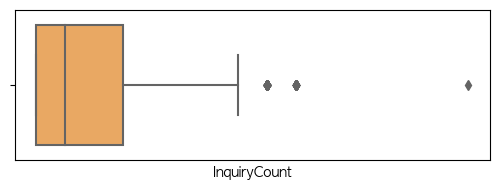

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(10, 2))

# InquiryCount 박스플롯 (가로 방향)
plt.subplot(1, 2, 1)
sns.boxplot(x=df_retired['InquiryCount'], color='#FFA94D')
plt.xticks([])  # y축 값 제거

plt.tight_layout()
plt.show()


#### 재직자

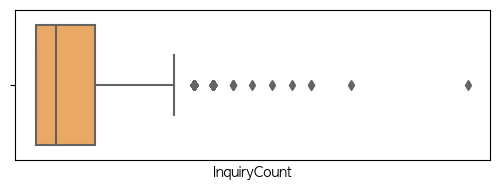

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(10, 2))


# InquiryCount 박스플롯 (가로 방향)
plt.subplot(1, 2, 1)
sns.boxplot(x=df_emp['InquiryCount'], color='#FFA94D')
plt.xticks([])  # y축 값 제거

plt.tight_layout()
plt.show()


### 이상치 확인

- Age, InterestRate, InquiryCount, InfoChangedYears 이상치 제거(양쪽)
- LoanRemainTerm, LoanAmount, InstallAmount, LoanRemainAmount, InfoChangedYears 이상치 제거(오른쪽)

#### 퇴직자

In [34]:
import numpy as np

# 복사본 생성 (원본 보존)
df_retired_iqr = df_retired.copy()

# 1. 위아래 제거할 변수들
both_sides = ['Age', 'InterestRate','InfoChangedYears','InquiryCount']

# 2. 위쪽만 제거할 변수들
upper_only = [
    'LoanRemainTerm', 'LoanAmount', 'InstallAmount',
    'LoanRemainAmount', 'InfoChangedYears'
]

# 위아래 제거 함수
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 위쪽만 제거 함수
def remove_upper_outliers(df, column):
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - df[column].quantile(0.25)
    upper_bound = Q3 + 1.5 * IQR
    return df[df[column] <= upper_bound]

# 적용
for col in both_sides:
    df_retired = remove_outliers_iqr(df_retired, col)

for col in upper_only:
    df_retired = remove_upper_outliers(df_retired, col)



#### 재직자

In [35]:
import numpy as np

# 복사본 생성 (원본 보존)
df_emp_iqr = df_emp.copy()

# 1. 위아래 제거할 변수들
both_sides = ['Age', 'InterestRate','InfoChangedYears','InquiryCount']

# 2. 위쪽만 제거할 변수들
upper_only = [
    'LoanRemainTerm', 'LoanAmount', 'InstallAmount',
    'LoanRemainAmount', 'InfoChangedYears'
]

# 위아래 제거 함수
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 위쪽만 제거 함수
def remove_upper_outliers(df, column):
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - df[column].quantile(0.25)
    upper_bound = Q3 + 1.5 * IQR
    return df[df[column] <= upper_bound]

# 적용
for col in both_sides:
    df_emp = remove_outliers_iqr(df_emp, col)

for col in upper_only:
    df_emp = remove_upper_outliers(df_emp, col)



### 이상치 제거 후 분포 확인

#### 퇴직자

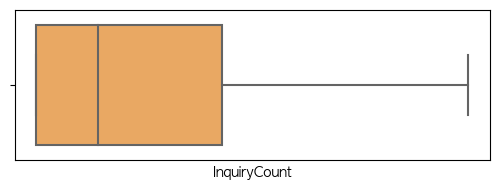

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(10, 2))

# InquiryCount 박스플롯 (가로 방향)
plt.subplot(1, 2, 1)
sns.boxplot(x=df_retired['InquiryCount'], color='#FFA94D')

plt.xticks([])  # y축 값 제거

plt.tight_layout()
plt.show()


#### 재직자

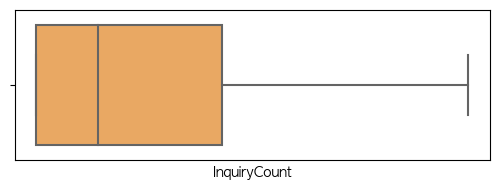

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(10, 2))

# InquiryCount 박스플롯 (가로 방향)
plt.subplot(1, 2, 1)
sns.boxplot(x=df_emp['InquiryCount'], color='#FFA94D')

plt.xticks([])  # y축 값 제거

plt.tight_layout()
plt.show()


In [38]:
df_retired.describe()

,Age,FamilyCount,ChildCount,Default,ApplHour,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestRate,LoanAmount,InstallAmount,LoanRemainAmount,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears,ScoreA,ScoreB,ScoreC,loan_months
count,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5.945000e+03,5945.000000,5945.000000,5945.000000,5945.000000,5.945000e+03,5.945000e+03,5.945000e+03,5945.000000,5945.000000,5945.000000,5945.000000,1802.000000,5880.000000,5600.000000,5945.000000
mean,58.543263,2.558452,0.915896,0.052481,12.861564,2.948343e+07,17.779647,31.856013,13.908326,5.204506,2.410629e+07,9.347667e+05,1.114143e+07,1.843566,9.786089,17.066426,2.481733,0.723196,0.650389,0.648722,17.947687
std,3.772228,1.068478,0.948537,0.223014,2.690366,1.289854e+07,8.940240,11.672551,8.792787,1.123802,1.063185e+07,5.681359e+05,6.972270e+06,1.827914,3.625534,11.582247,2.228281,0.152454,0.205669,0.193443,10.842246
min,48.900000,1.000000,0.000000,0.000000,9.000000,1.500000e+07,0.000000,12.000000,1.000000,2.000000,1.050000e+07,2.234094e+05,4.059611e+05,0.000000,0.000000,0.000000,0.000000,0.016000,0.000000,0.001000,2.000000
25%,56.200000,2.000000,0.000000,0.000000,11.000000,2.000000e+07,10.000000,24.000000,7.000000,4.390000,1.600000e+07,5.113403e+05,5.866875e+06,0.000000,8.400000,6.800000,0.500000,0.658000,0.535000,0.531750,9.000000
50%,58.300000,2.000000,1.000000,0.000000,13.000000,2.500000e+07,20.000000,36.000000,12.000000,5.100000,2.100000e+07,7.182000e+05,9.868500e+06,1.000000,11.100000,16.100000,1.900000,0.753000,0.668000,0.672000,16.000000
75%,60.700000,3.000000,2.000000,0.000000,15.000000,4.300000e+07,30.000000,36.000000,19.000000,6.190000,3.010000e+07,1.193625e+06,1.508985e+07,3.000000,12.200000,26.700000,4.200000,0.826000,0.777000,0.780000,24.000000
max,67.600000,5.000000,3.000000,1.000000,19.000000,6.100000e+07,30.000000,48.000000,37.000000,7.430000,5.490000e+07,2.678750e+06,3.115962e+07,7.000000,15.000000,56.200000,8.600000,0.994000,0.999000,0.999000,46.000000


- 이상치 제거 후 데이터 개수
    - df_retired : 5945
    - df_emp : 25782

In [39]:
# df_emp 저장
df_emp.to_csv("df_emp_cleaned.csv", index=False, encoding="euc-kr")

# df_retired 저장
df_retired.to_csv("df_retired_cleaned.csv", index=False, encoding="euc-kr")

## 고객 특성 파악
<범주형, 연속형 데이터별>
- 재직자 : 변수와 연체 여부 관계 파악
- 퇴직자 : 변수와 연체 여부 관계 파악

## 범주형 데이터

#### 재직자

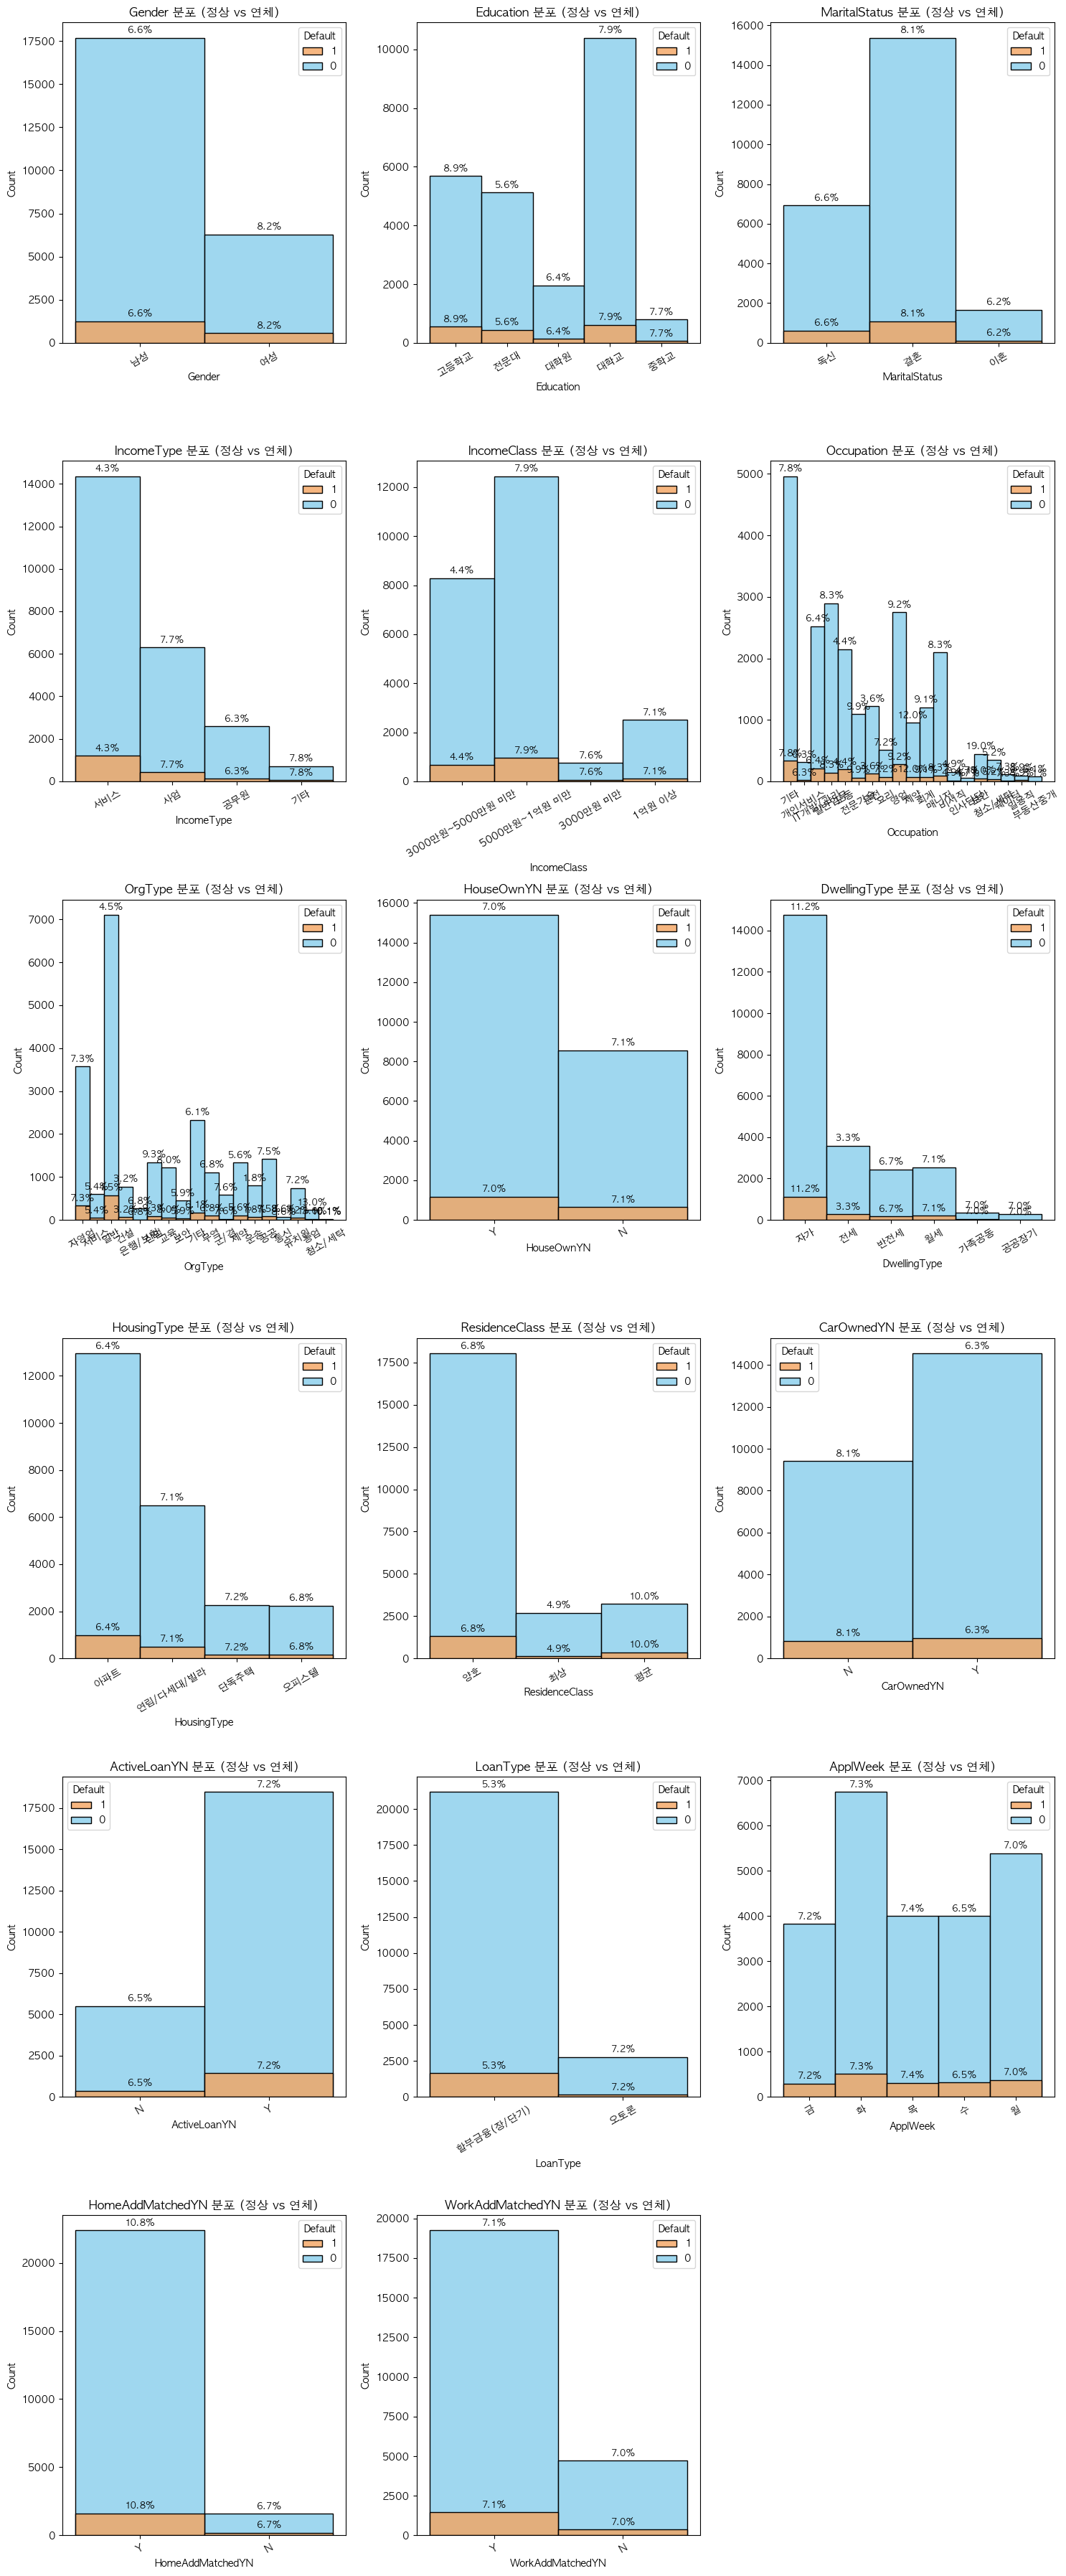

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 범주형 변수 리스트
cat_cols = ['Gender', 'Education', 'MaritalStatus', 'IncomeType', 'IncomeClass', 
            'Occupation', 'OrgType', 'HouseOwnYN', 'DwellingType', 'HousingType', 
            'ResidenceClass', 'CarOwnedYN', 'ActiveLoanYN', 'LoanType', 'ApplWeek', 
            'HomeAddMatchedYN', 'WorkAddMatchedYN']

n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 6 * n_rows))

for i, col in enumerate(cat_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)

    # 히스토그램
    sns.histplot(data=df_emp, x=col, hue='Default', hue_order=[1,0], kde=False, bins=30,
                 palette={0: 'skyblue', 1: 'sandybrown'}, multiple='layer', alpha=0.8, ax=ax)

    ax.set_title(f'{col} 분포 (정상 vs 연체)')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=30)

    # ✅ 연체율 계산
    rate_df = df_emp.groupby(col)['Default'].agg(['sum', 'count']).reset_index()
    rate_df['rate'] = rate_df['sum'] / rate_df['count'] * 100

    # ✅ 막대 위치 파악 후 비율 표시
    for patch in ax.patches:
        # patch.get_x()는 막대 시작 x, patch.get_width()는 너비
        bar_x = patch.get_x() + patch.get_width() / 2
        bar_height = patch.get_height()
        
        # 해당 막대가 어떤 범주에 해당하는지 찾기
        x_val = patch.get_x() + patch.get_width() / 2
        # x_val이 어떤 col 값인지 찾아야 함
        # -> 가장 가까운 group 값을 기반으로 매칭
        for idx, row in rate_df.iterrows():
            if abs(bar_x - idx) < 0.3:  # 위치 대략 매칭
                ax.annotate(f"{row['rate']:.1f}%", 
                            xy=(bar_x, bar_height), 
                            xytext=(0, 5), 
                            textcoords='offset points',
                            ha='center', fontsize=9, color='black', fontweight='bold')
                break

plt.tight_layout()
plt.show()


#### 퇴직자

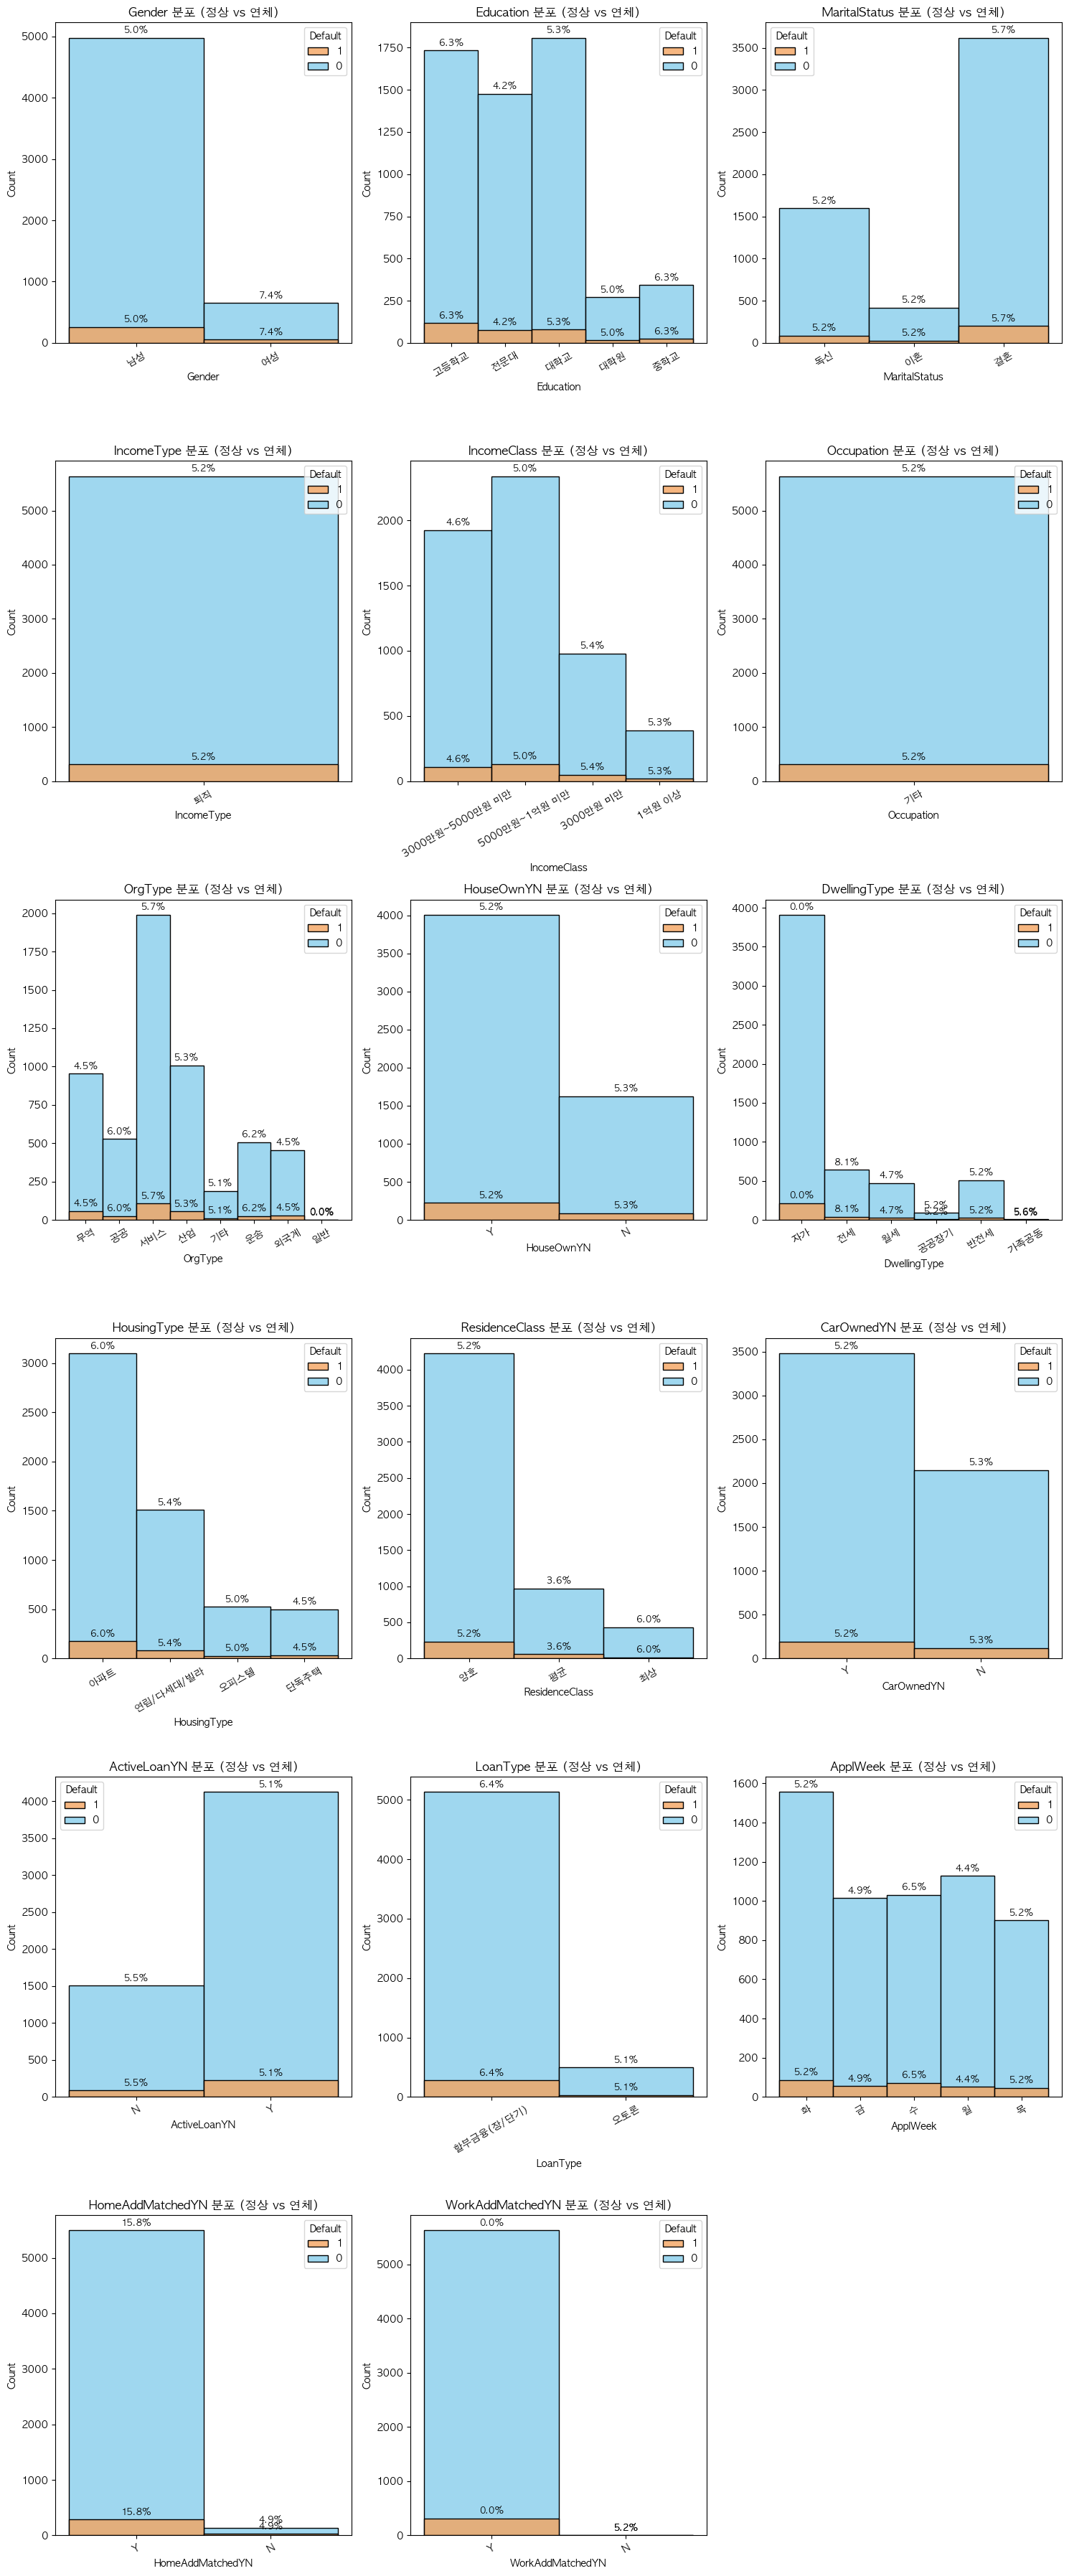

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 범주형 변수 리스트
cat_cols = ['Gender', 'Education', 'MaritalStatus', 'IncomeType', 'IncomeClass', 
            'Occupation', 'OrgType', 'HouseOwnYN', 'DwellingType', 'HousingType', 
            'ResidenceClass', 'CarOwnedYN', 'ActiveLoanYN', 'LoanType', 'ApplWeek', 
            'HomeAddMatchedYN', 'WorkAddMatchedYN']

n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 6 * n_rows))

for i, col in enumerate(cat_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)

    # 히스토그램
    sns.histplot(data=df_retired, x=col, hue='Default', hue_order=[1,0], kde=False, bins=30,
                 palette={0: 'skyblue', 1: 'sandybrown'}, multiple='layer', alpha=0.8, ax=ax)

    ax.set_title(f'{col} 분포 (정상 vs 연체)')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=30)

    # ✅ 연체율 계산
    rate_df = df_retired.groupby(col)['Default'].agg(['sum', 'count']).reset_index()
    rate_df['rate'] = rate_df['sum'] / rate_df['count'] * 100

    # ✅ 막대 위치 파악 후 비율 표시
    for patch in ax.patches:
        # patch.get_x()는 막대 시작 x, patch.get_width()는 너비
        bar_x = patch.get_x() + patch.get_width() / 2
        bar_height = patch.get_height()
        
        # 해당 막대가 어떤 범주에 해당하는지 찾기
        x_val = patch.get_x() + patch.get_width() / 2
        # x_val이 어떤 col 값인지 찾아야 함
        # -> 가장 가까운 group 값을 기반으로 매칭
        for idx, row in rate_df.iterrows():
            if abs(bar_x - idx) < 0.3:  # 위치 대략 매칭
                ax.annotate(f"{row['rate']:.1f}%", 
                            xy=(bar_x, bar_height), 
                            xytext=(0, 5), 
                            textcoords='offset points',
                            ha='center', fontsize=9, color='black', fontweight='bold')
                break

plt.tight_layout()
plt.show()


## 연속형 데이터 

#### 재직자

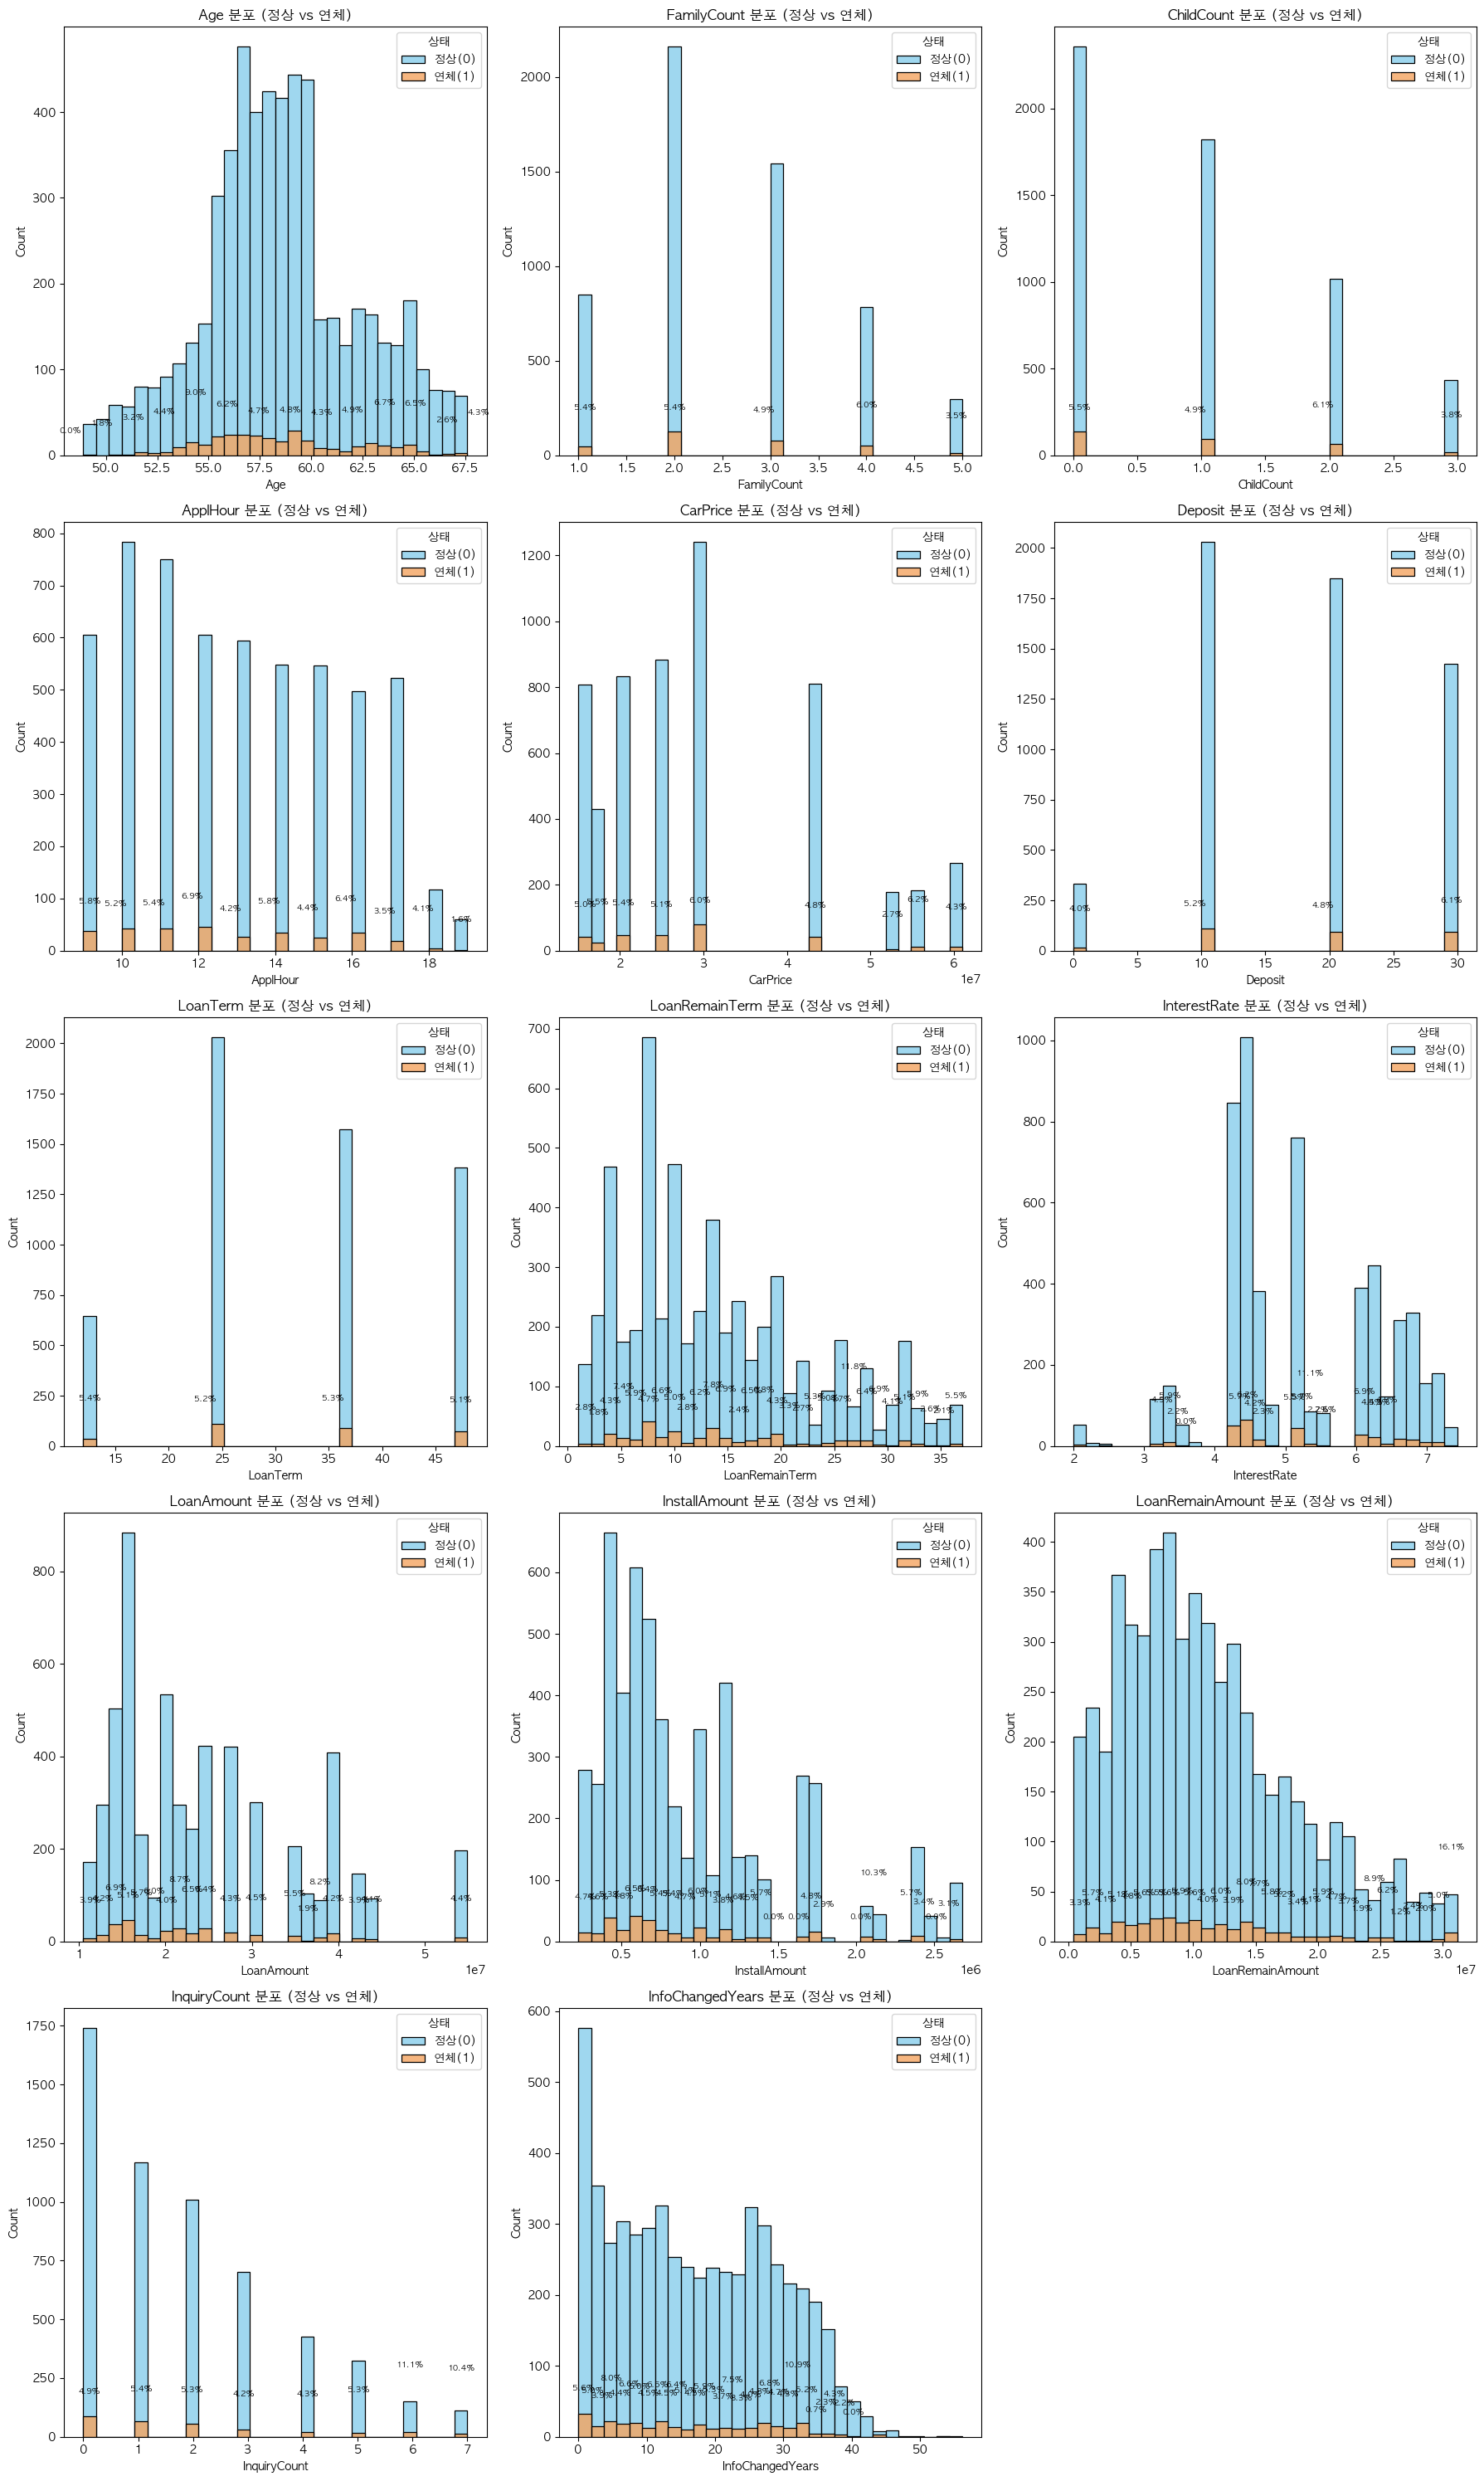

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 수치형 변수 리스트
num_cols = ['Age','FamilyCount','ChildCount','ApplHour', 'CarPrice','Deposit','LoanTerm',
            'LoanRemainTerm', 'InterestRate', 'LoanAmount','InstallAmount', 
            'LoanRemainAmount', 'InquiryCount','InfoChangedYears']

plt.figure(figsize=(18, 30))  # ✅ 높이 좀 더 크게 조정

for i, col in enumerate(num_cols):
    ax = plt.subplot(5, 3, i + 1)

    # ✅ 히스토그램 시각화
    sns.histplot(data=df_retired, x=col, hue='Default', hue_order=[1,0], kde=False, bins=30,
                 palette={0: 'skyblue', 1: 'sandybrown'}, multiple='layer', alpha=0.8, ax=ax)

    ax.set_title(f'{col} 분포 (정상 vs 연체)')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='상태', labels=['정상(0)', '연체(1)'])

    # ✅ 각 bin 구간별 연체율 계산 및 표시
    # bin 정의 (30개 구간)
    bins = np.histogram_bin_edges(df_emp[col].dropna(), bins=30)
    df_retired['bin'] = pd.cut(df_retired[col], bins=bins, include_lowest=True)

    bin_stats = df_retired.groupby('bin')['Default'].agg(['sum', 'count']).reset_index()
    bin_stats['rate'] = bin_stats['sum'] / bin_stats['count'] * 100

    # x 좌표는 각 bin의 중앙값으로
    bin_centers = [interval.mid for interval in bin_stats['bin']]

    # annotate 위치를 bin_stats['count'] 대신 r에 비례한 위치로 조절 (좀 더 크게 보이게)
    max_y = df_retired[col].value_counts(bins=30).max()
    for x, r in zip(bin_centers, bin_stats['rate']):
        if not np.isnan(r):
            ax.annotate(f"{r:.1f}%", 
                        xy=(x, max_y * 0.05 + max_y * (r / 100)),  # 퍼센트 비율을 y값처럼 사용
                        xytext=(0, 0),
                        textcoords='offset points',
                        ha='center', fontsize=7, color='black')


plt.tight_layout()
plt.show()

# 깔끔하게 정리
df_emp.drop(columns='bin', inplace=True, errors='ignore')


#### 퇴직자

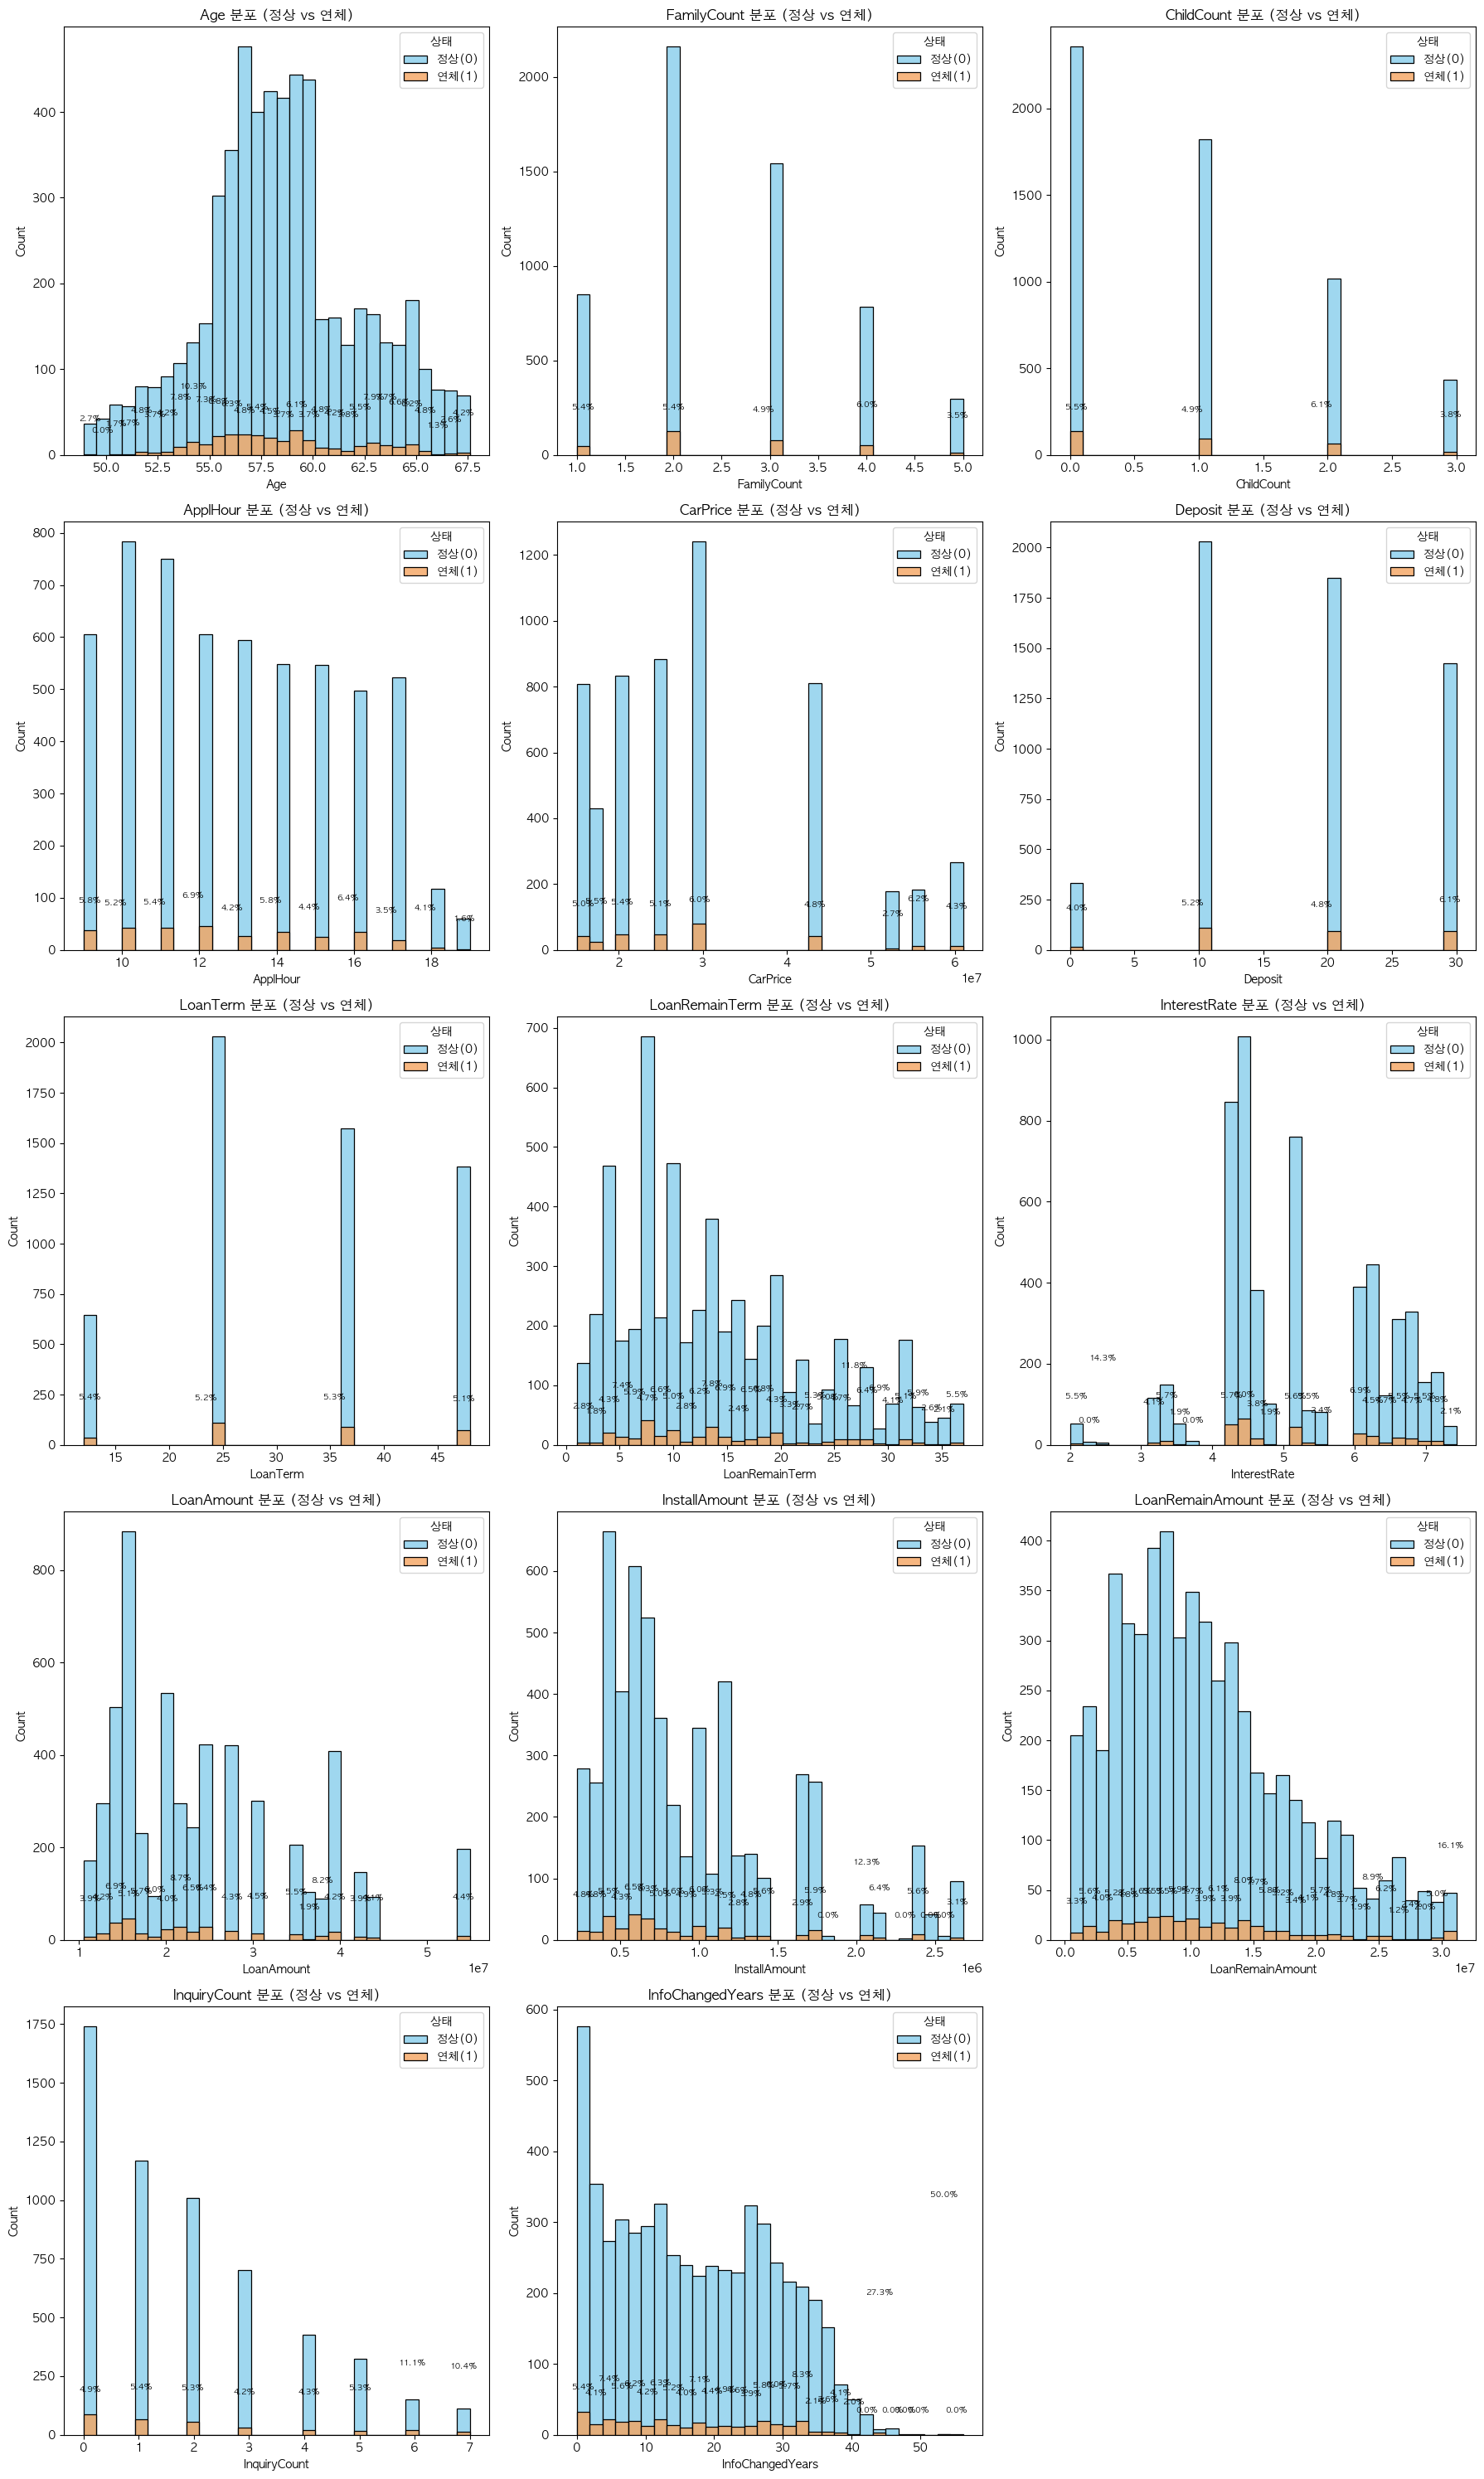

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 수치형 변수 리스트
num_cols = ['Age','FamilyCount','ChildCount','ApplHour', 'CarPrice','Deposit','LoanTerm',
            'LoanRemainTerm', 'InterestRate', 'LoanAmount','InstallAmount', 
            'LoanRemainAmount', 'InquiryCount','InfoChangedYears']

plt.figure(figsize=(18, 30))  # ✅ 높이 좀 더 크게 조정

for i, col in enumerate(num_cols):
    ax = plt.subplot(5, 3, i + 1)

    # ✅ 히스토그램 시각화
    sns.histplot(data=df_retired, x=col, hue='Default', hue_order=[1,0], kde=False, bins=30,
                 palette={0: 'skyblue', 1: 'sandybrown'}, multiple='layer', alpha=0.8, ax=ax)

    ax.set_title(f'{col} 분포 (정상 vs 연체)')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='상태', labels=['정상(0)', '연체(1)'])

    # ✅ 각 bin 구간별 연체율 계산 및 표시
    # bin 정의 (30개 구간)
    bins = np.histogram_bin_edges(df_retired[col].dropna(), bins=30)
    df_retired['bin'] = pd.cut(df_retired[col], bins=bins, include_lowest=True)

    bin_stats = df_retired.groupby('bin')['Default'].agg(['sum', 'count']).reset_index()
    bin_stats['rate'] = bin_stats['sum'] / bin_stats['count'] * 100

    # x 좌표는 각 bin의 중앙값으로
    bin_centers = [interval.mid for interval in bin_stats['bin']]

    # annotate 위치를 bin_stats['count'] 대신 r에 비례한 위치로 조절 (좀 더 크게 보이게)
    max_y = df_retired[col].value_counts(bins=30).max()
    for x, r in zip(bin_centers, bin_stats['rate']):
        if not np.isnan(r):
            ax.annotate(f"{r:.1f}%", 
                        xy=(x, max_y * 0.05 + max_y * (r / 100)),  # 퍼센트 비율을 y값처럼 사용
                        xytext=(0, 0),
                        textcoords='offset points',
                        ha='center', fontsize=7, color='black')


plt.tight_layout()
plt.show()

# 깔끔하게 정리
df_retired.drop(columns='bin', inplace=True, errors='ignore')


## 연속형 데이터 

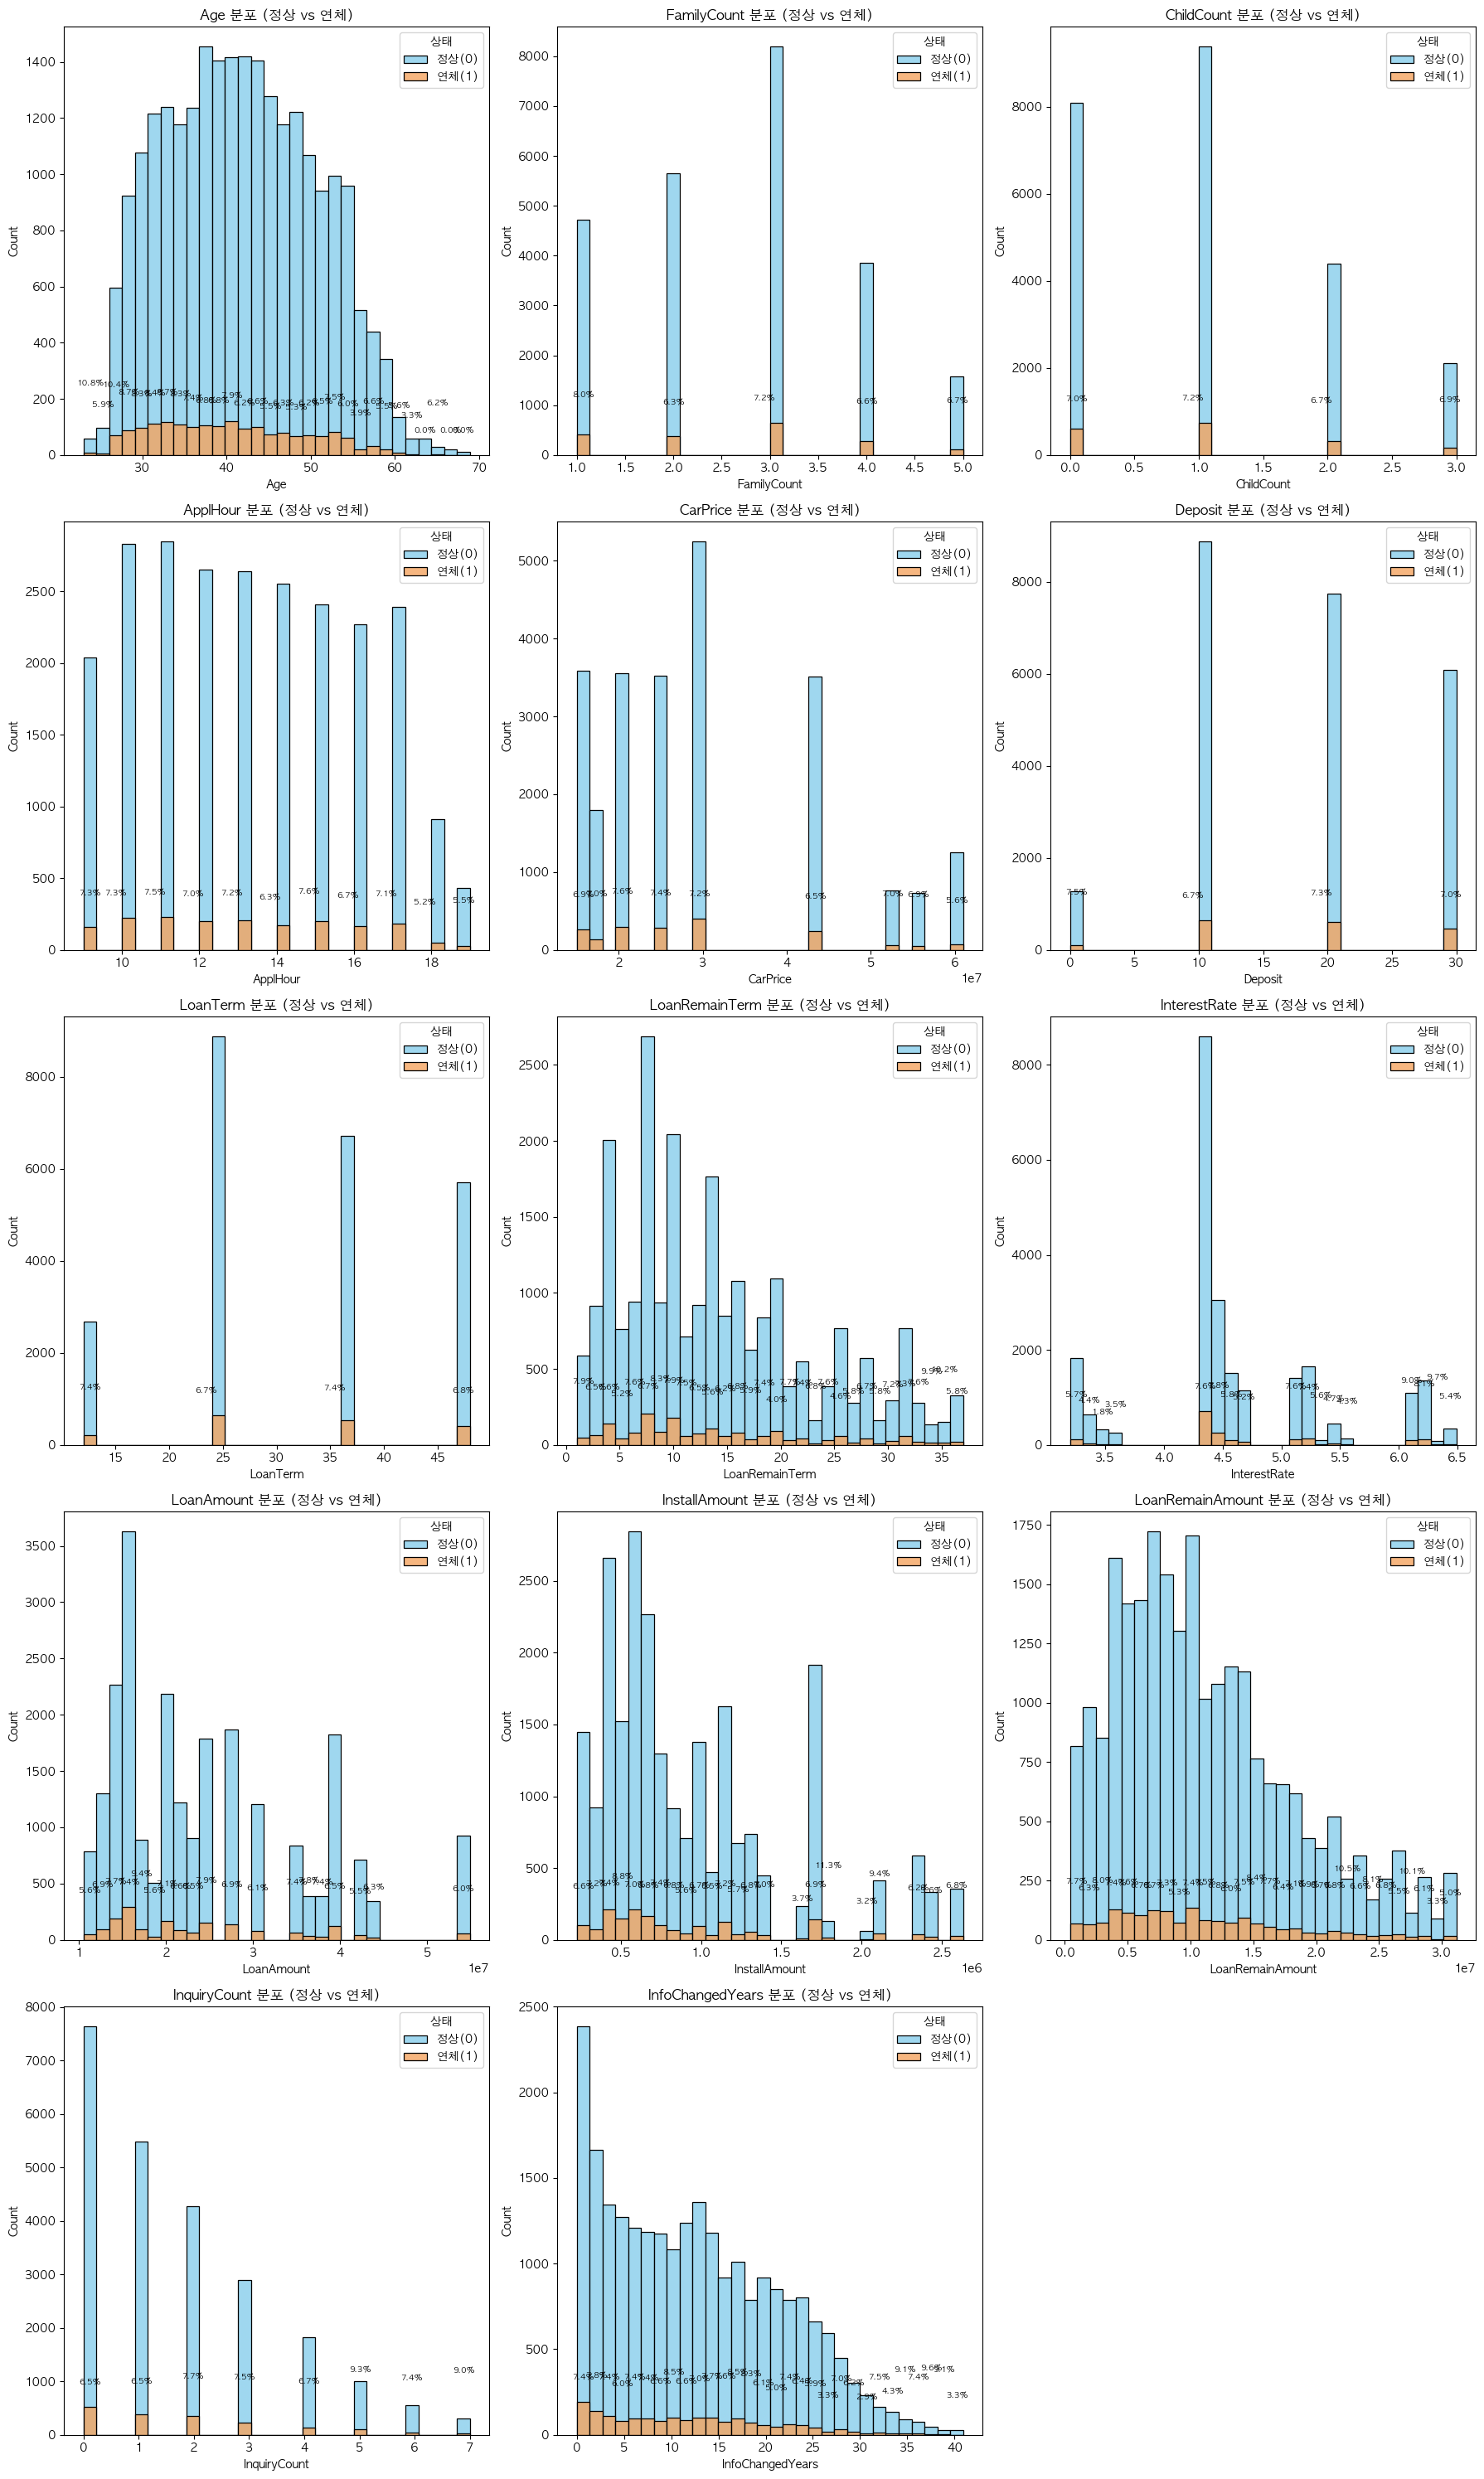

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 수치형 변수 리스트
num_cols = ['Age','FamilyCount','ChildCount','ApplHour', 'CarPrice','Deposit','LoanTerm',
            'LoanRemainTerm', 'InterestRate', 'LoanAmount','InstallAmount', 
            'LoanRemainAmount', 'InquiryCount','InfoChangedYears']

plt.figure(figsize=(18, 30))  # ✅ 높이 좀 더 크게 조정

for i, col in enumerate(num_cols):
    ax = plt.subplot(5, 3, i + 1)

    # ✅ 히스토그램 시각화
    sns.histplot(data=df_emp, x=col, hue='Default', hue_order=[1,0], kde=False, bins=30,
                 palette={0: 'skyblue', 1: 'sandybrown'}, multiple='layer', alpha=0.8, ax=ax)

    ax.set_title(f'{col} 분포 (정상 vs 연체)')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='상태', labels=['정상(0)', '연체(1)'])

    # ✅ 각 bin 구간별 연체율 계산 및 표시
    # bin 정의 (30개 구간)
    bins = np.histogram_bin_edges(df_emp[col].dropna(), bins=30)
    df_emp['bin'] = pd.cut(df_emp[col], bins=bins, include_lowest=True)

    bin_stats = df_emp.groupby('bin')['Default'].agg(['sum', 'count']).reset_index()
    bin_stats['rate'] = bin_stats['sum'] / bin_stats['count'] * 100

    # x 좌표는 각 bin의 중앙값으로
    bin_centers = [interval.mid for interval in bin_stats['bin']]

    # annotate 위치를 bin_stats['count'] 대신 r에 비례한 위치로 조절 (좀 더 크게 보이게)
    max_y = df_emp[col].value_counts(bins=30).max()
    for x, r in zip(bin_centers, bin_stats['rate']):
        if not np.isnan(r):
            ax.annotate(f"{r:.1f}%", 
                        xy=(x, max_y * 0.05 + max_y * (r / 100)),  # 퍼센트 비율을 y값처럼 사용
                        xytext=(0, 0),
                        textcoords='offset points',
                        ha='center', fontsize=7, color='black')


plt.tight_layout()
plt.show()

# 깔끔하게 정리
df_emp.drop(columns='bin', inplace=True, errors='ignore')


## t-test

In [45]:
# 수치형 변수 (Default 제외)
num_cols = [
    'Age', 'FamilyCount', 'ChildCount', 'EmployedYears',
    'ApplHour', 'CarPrice', 'Deposit', 'LoanTerm', 'LoanRemainTerm',
    'InterestRate', 'LoanAmount', 'InstallAmount', 'LoanRemainAmount',
    'InquiryCount', 'IdChangedYears', 'InfoChangedYears', 'PhoneChangedYears',
]

# 결과 저장
ttest_results = []

for col in num_cols:
    group0 = df_emp[df_emp['Default'] == 0][col]
    group1 = df_emp[df_emp['Default'] == 1][col]

    t_stat, p_val = ttest_ind(group0, group1, equal_var=False, nan_policy='omit')
    ttest_results.append({'변수': col, 'p-value': round(p_val, 4)})  # 여기 반올림 적용

# 결과 정리
ttest_df = pd.DataFrame(ttest_results).sort_values(by='p-value')

# 유의미한 변수만 보기 (p < 0.05)
significant = ttest_df[ttest_df['p-value'] < 0.05]

# 출력
print("전체 t-test 결과:\n", ttest_df)
print("\n유의미한 변수들 (p < 0.05):\n", significant)


전체 t-test 결과:
                    변수  p-value
0                 Age   0.0000
3       EmployedYears   0.0000
16  PhoneChangedYears   0.0000
9        InterestRate   0.0002
13       InquiryCount   0.0008
15   InfoChangedYears   0.0056
14     IdChangedYears   0.0124
10         LoanAmount   0.0339
5            CarPrice   0.0409
4            ApplHour   0.0553
1         FamilyCount   0.0713
11      InstallAmount   0.3203
12   LoanRemainAmount   0.4517
2          ChildCount   0.6200
6             Deposit   0.7747
7            LoanTerm   0.7798
8      LoanRemainTerm   0.9485

유의미한 변수들 (p < 0.05):
                    변수  p-value
0                 Age   0.0000
3       EmployedYears   0.0000
16  PhoneChangedYears   0.0000
9        InterestRate   0.0002
13       InquiryCount   0.0008
15   InfoChangedYears   0.0056
14     IdChangedYears   0.0124
10         LoanAmount   0.0339
5            CarPrice   0.0409


## Chi-squared

In [46]:
from scipy.stats import chi2_contingency
import pandas as pd

# ✅ 원본 범주형 변수 (더미화 X)
cat_vars = [
  'Gender', 'Education', 'MaritalStatus', 'IncomeType', 'IncomeClass', 
            'Occupation', 'OrgType', 'HouseOwnYN', 'DwellingType', 'HousingType', 
            'ResidenceClass', 'CarOwnedYN', 'ActiveLoanYN', 'LoanType', 'ApplWeek', 
            'HomeAddMatchedYN', 'WorkAddMatchedYN'
]

chi_results = []

# ✅ 변수별 카이제곱 검정
for col in cat_vars:
    try:
        table = pd.crosstab(df_emp[col], df_emp['Default'])

        if table.shape[0] >= 2 and table.shape[1] >= 2:
            chi2, p, dof, expected = chi2_contingency(table)
            chi_results.append({'변수': col, 'p_value': p})
    except Exception as e:
        print(f" {col} 오류: {e}")

# ✅ 결과 정리 및 출력
chi_df = pd.DataFrame(chi_results)

if not chi_df.empty:
    chi_df['p_value'] = chi_df['p_value'].round(4)
    chi_df = chi_df.sort_values(by='p_value')

    print(" 유의미한 변수 목록 (p < 0.05):")
    print(chi_df[chi_df['p_value'] < 0.05])

    print("\n 유의미하지 않은 변수 목록 (p ≥ 0.05):")
    print(chi_df[chi_df['p_value'] >= 0.05])
else:
    print(" 카이제곱 결과 없음")


 유의미한 변수 목록 (p < 0.05):
                  변수  p_value
0             Gender   0.0000
1          Education   0.0000
3         IncomeType   0.0000
4        IncomeClass   0.0000
5         Occupation   0.0000
6            OrgType   0.0000
15  HomeAddMatchedYN   0.0000
11        CarOwnedYN   0.0000
10    ResidenceClass   0.0000
2      MaritalStatus   0.0001
13          LoanType   0.0001
8       DwellingType   0.0037

 유의미하지 않은 변수 목록 (p ≥ 0.05):
                  변수  p_value
12      ActiveLoanYN   0.0849
14          ApplWeek   0.4022
9        HousingType   0.5308
16  WorkAddMatchedYN   0.7480
7         HouseOwnYN   0.7932


# test data set 정제

In [47]:
dfloan_test = pd.read_csv('/Users/minjoo/PoscoBAA/BigData/BigData_Project/C3_할부금융/auto_loan_test.csv', encoding='euc-kr')
dfc_test = pd.read_csv('/Users/minjoo/PoscoBAA/BigData/BigData_Project/C3_할부금융/auto_customer_test.csv', encoding='euc-kr')

In [48]:
dft = pd.merge(dfc_test, dfloan_test, how='inner',on='CustomerId')

In [49]:
cols_to_drop = ['CustomerId', 'LoanId', 'HouseAge', 'Default', 'InterestRate', 'InstallAmount', 'ScoreA', 'ScoreB', 'ScoreC']
dft = dft.drop(columns=[col for col in cols_to_drop if col in dft.columns])

In [50]:
dft.describe()

,Age,FamilyCount,ChildCount,EmployedYears,ApplHour,CarPrice,Deposit,LoanTerm,LoanRemainTerm,LoanAmount,LoanRemainAmount,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangeYears
count,9974.000000,9974.000000,9974.000000,8137.000000,9974.000000,9.974000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9.974000e+03,9974.000000,9888.000000,9974.000000,9866.000000
mean,43.535161,2.606477,0.978945,3.662750,13.174554,3.211390e+07,17.470423,30.939643,30.939643,2.655781e+07,2.655781e+07,1.744736,7.724929,13.026078,2.611230
std,10.301820,1.137777,0.923396,5.518049,2.755724,1.456716e+07,9.280108,12.434534,12.434534,1.270895e+07,1.270895e+07,1.838951,4.343918,9.544452,2.230733
min,23.000000,1.000000,0.000000,-2.700000,9.000000,1.500000e+07,0.000000,12.000000,12.000000,1.050000e+07,1.050000e+07,0.000000,0.000000,0.000000,0.000000
25%,35.025000,2.000000,0.000000,-0.500000,11.000000,2.000000e+07,10.000000,24.000000,24.000000,1.600000e+07,1.600000e+07,0.000000,4.000000,4.600000,0.700000
50%,42.800000,3.000000,1.000000,2.000000,13.000000,3.000000e+07,20.000000,36.000000,36.000000,2.250000e+07,2.250000e+07,1.000000,8.400000,11.900000,2.100000
75%,52.200000,3.000000,2.000000,6.200000,15.000000,4.300000e+07,20.000000,36.000000,36.000000,3.850000e+07,3.850000e+07,3.000000,11.600000,19.900000,4.400000
max,69.000000,5.000000,3.000000,24.600000,19.000000,6.100000e+07,30.000000,48.000000,48.000000,5.500000e+07,5.500000e+07,19.000000,15.000000,53.900000,8.600000


- 퇴직자 재직자 구분

In [51]:
# 퇴직자 재직자
# 1. 퇴직자
dft_retired = dft[(dft['IncomeType'] == '퇴직')]

# 2. 재직자
dft_emp = dft[(dft['IncomeType'] != '퇴직')]

In [52]:
dft_retired = dft_retired.drop(columns=['EmployedYears'])

In [53]:
# 퇴직자 데이터 확인
dft_retired.head()

,Gender,Age,Education,MaritalStatus,FamilyCount,ChildCount,IncomeType,IncomeClass,Occupation,OrgType,HouseOwnYN,DwellingType,HousingType,ResidenceClass,CarOwnedYN,ActiveLoanYN,LoanType,ApplWeek,ApplHour,Accompany,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestType,LoanAmount,LoanRemainAmount,HomeAddMatchedYN,WorkAddMatchedYN,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangeYears
229,남성,44.9,전문대,독신,4,3,퇴직,5000만원~1억원 미만,기타,서비스,N,전세,아파트,최상,N,Y,할부금융(장/단기),화,16,단독,25000000,10,24,24,변동,22500000,22500000,Y,Y,0,11.3,14.0,2.6
287,남성,49.6,전문대,독신,2,1,퇴직,5000만원~1억원 미만,기타,무역,Y,자가,아파트,양호,N,N,할부금융(장/단기),금,9,단독,43000000,20,48,48,변동,34400000,34400000,Y,Y,5,4.3,23.4,4.2
304,남성,51.2,대학교,독신,3,2,퇴직,3000만원~5000만원 미만,기타,무역,N,반전세,아파트,양호,N,Y,할부금융(장/단기),화,11,단독,30000000,10,24,24,변동,27000000,27000000,Y,Y,0,6.1,8.2,0.0
306,남성,51.3,중학교,결혼,2,0,퇴직,5000만원~1억원 미만,기타,서비스,Y,자가,아파트,최상,Y,Y,할부금융(장/단기),수,11,단독,52000000,20,36,36,변동,41600000,41600000,Y,Y,3,6.2,23.2,3.0
308,남성,51.5,대학교,이혼,1,0,퇴직,5000만원~1억원 미만,기타,서비스,Y,자가,아파트,양호,Y,Y,할부금융(장/단기),수,14,단독,18000000,10,24,24,변동,16200000,16200000,Y,Y,6,6.3,30.0,4.7


In [54]:
# 퇴직자 데이터 인덱스 확인
dft_retired.reset_index(drop=True, inplace=True)
dft_retired.index = dft_retired.index

In [55]:
dft_retired.head()

,Gender,Age,Education,MaritalStatus,FamilyCount,ChildCount,IncomeType,IncomeClass,Occupation,OrgType,HouseOwnYN,DwellingType,HousingType,ResidenceClass,CarOwnedYN,ActiveLoanYN,LoanType,ApplWeek,ApplHour,Accompany,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestType,LoanAmount,LoanRemainAmount,HomeAddMatchedYN,WorkAddMatchedYN,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangeYears
0,남성,44.9,전문대,독신,4,3,퇴직,5000만원~1억원 미만,기타,서비스,N,전세,아파트,최상,N,Y,할부금융(장/단기),화,16,단독,25000000,10,24,24,변동,22500000,22500000,Y,Y,0,11.3,14.0,2.6
1,남성,49.6,전문대,독신,2,1,퇴직,5000만원~1억원 미만,기타,무역,Y,자가,아파트,양호,N,N,할부금융(장/단기),금,9,단독,43000000,20,48,48,변동,34400000,34400000,Y,Y,5,4.3,23.4,4.2
2,남성,51.2,대학교,독신,3,2,퇴직,3000만원~5000만원 미만,기타,무역,N,반전세,아파트,양호,N,Y,할부금융(장/단기),화,11,단독,30000000,10,24,24,변동,27000000,27000000,Y,Y,0,6.1,8.2,0.0
3,남성,51.3,중학교,결혼,2,0,퇴직,5000만원~1억원 미만,기타,서비스,Y,자가,아파트,최상,Y,Y,할부금융(장/단기),수,11,단독,52000000,20,36,36,변동,41600000,41600000,Y,Y,3,6.2,23.2,3.0
4,남성,51.5,대학교,이혼,1,0,퇴직,5000만원~1억원 미만,기타,서비스,Y,자가,아파트,양호,Y,Y,할부금융(장/단기),수,14,단독,18000000,10,24,24,변동,16200000,16200000,Y,Y,6,6.3,30.0,4.7


In [56]:
# 재직자 데이터 확인
dft_emp.head()

,Gender,Age,Education,MaritalStatus,FamilyCount,ChildCount,IncomeType,IncomeClass,Occupation,OrgType,EmployedYears,HouseOwnYN,DwellingType,HousingType,ResidenceClass,CarOwnedYN,ActiveLoanYN,LoanType,ApplWeek,ApplHour,Accompany,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestType,LoanAmount,LoanRemainAmount,HomeAddMatchedYN,WorkAddMatchedYN,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangeYears
0,남성,23.0,대학교,독신,1,0,서비스,3000만원 미만,일반업무,은행/보험,-2.4,Y,자가,아파트,양호,N,N,오토론,월,11,단독,52000000,20,36,36,변동,41600000,41600000,Y,Y,1,2.9,2.7,1.9
1,남성,23.7,대학교,독신,1,0,사업,3000만원 미만,기타,무역,-1.7,N,전세,아파트,양호,N,N,할부금융(장/단기),수,13,단독,18000000,10,24,24,변동,16200000,16200000,Y,Y,3,3.7,9.4,3.6
2,남성,24.5,대학교,이혼,1,0,서비스,3000만원~5000만원 미만,영업,기타,-2.3,Y,자가,아파트,양호,N,Y,할부금융(장/단기),화,15,단독,18000000,10,24,24,변동,16200000,16200000,Y,Y,0,2.5,0.5,2.6
3,여성,24.8,고등학교,독신,1,0,사업,3000만원 미만,운전,기타,-0.6,Y,자가,연립/다세대/빌라,양호,N,Y,할부금융(장/단기),수,13,단독,20000000,0,12,12,변동,20000000,20000000,Y,Y,2,4.7,9.8,0.0
4,여성,25.0,대학교,독신,1,0,사업,3000만원 미만,영업,무역,1.8,Y,자가,아파트,양호,N,Y,할부금융(장/단기),금,12,단독,30000000,30,48,48,혼합,21000000,21000000,Y,Y,4,4.6,25.0,5.4


In [57]:
# 재직자 데이터 인덱스 확인
dft_emp.reset_index(drop=True, inplace=True)
dft_emp.index = dft_emp.index

In [58]:
dft_emp.head()

,Gender,Age,Education,MaritalStatus,FamilyCount,ChildCount,IncomeType,IncomeClass,Occupation,OrgType,EmployedYears,HouseOwnYN,DwellingType,HousingType,ResidenceClass,CarOwnedYN,ActiveLoanYN,LoanType,ApplWeek,ApplHour,Accompany,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestType,LoanAmount,LoanRemainAmount,HomeAddMatchedYN,WorkAddMatchedYN,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangeYears
0,남성,23.0,대학교,독신,1,0,서비스,3000만원 미만,일반업무,은행/보험,-2.4,Y,자가,아파트,양호,N,N,오토론,월,11,단독,52000000,20,36,36,변동,41600000,41600000,Y,Y,1,2.9,2.7,1.9
1,남성,23.7,대학교,독신,1,0,사업,3000만원 미만,기타,무역,-1.7,N,전세,아파트,양호,N,N,할부금융(장/단기),수,13,단독,18000000,10,24,24,변동,16200000,16200000,Y,Y,3,3.7,9.4,3.6
2,남성,24.5,대학교,이혼,1,0,서비스,3000만원~5000만원 미만,영업,기타,-2.3,Y,자가,아파트,양호,N,Y,할부금융(장/단기),화,15,단독,18000000,10,24,24,변동,16200000,16200000,Y,Y,0,2.5,0.5,2.6
3,여성,24.8,고등학교,독신,1,0,사업,3000만원 미만,운전,기타,-0.6,Y,자가,연립/다세대/빌라,양호,N,Y,할부금융(장/단기),수,13,단독,20000000,0,12,12,변동,20000000,20000000,Y,Y,2,4.7,9.8,0.0
4,여성,25.0,대학교,독신,1,0,사업,3000만원 미만,영업,무역,1.8,Y,자가,아파트,양호,N,Y,할부금융(장/단기),금,12,단독,30000000,30,48,48,혼합,21000000,21000000,Y,Y,4,4.6,25.0,5.4


In [59]:
dft_emp = dft_emp[dft_emp['IncomeClass'] != '누락']
dft_emp = dft_emp[dft_emp['ResidenceClass'] != '누락']
dft_emp = dft_emp[dft_emp['DwellingType'] != '정보누락']

In [60]:
dft_retired = dft_retired[dft_retired['IncomeClass'] != '누락']
dft_retired = dft_retired[dft_retired['ResidenceClass'] != '누락']
dft_retired = dft_retired[dft_retired['DwellingType'] != '정보누락']

In [61]:
dft_emp.isnull().sum()

Gender                0
Age                   0
Education             0
MaritalStatus         0
FamilyCount           0
ChildCount            0
IncomeType            0
IncomeClass           0
Occupation            0
OrgType               0
EmployedYears       479
HouseOwnYN            0
DwellingType          0
HousingType           0
ResidenceClass        0
CarOwnedYN            0
ActiveLoanYN          0
LoanType              0
ApplWeek              0
ApplHour              0
Accompany             0
CarPrice              0
Deposit               0
LoanTerm              0
LoanRemainTerm        0
InterestType          0
LoanAmount            0
LoanRemainAmount      0
HomeAddMatchedYN      0
WorkAddMatchedYN      0
InquiryCount          0
IdChangedYears       76
InfoChangedYears      0
PhoneChangeYears     86
dtype: int64

In [62]:
dft_emp = dft_emp.dropna(subset=['EmployedYears','IdChangedYears','PhoneChangeYears'])

In [63]:
dft_retired = dft_retired.dropna(subset=['IdChangedYears','PhoneChangeYears'])

In [64]:
dft_emp = dft_emp[dft_emp['EmployedYears']>=0]

In [65]:
dft_emp.rename(columns={'PhoneChangeYears': 'PhoneChangedYears'}, inplace=True)

In [66]:
dft_retired.rename(columns={'PhoneChangeYears': 'PhoneChangedYears'}, inplace=True)

- 이상치 제거

#### 재직자

In [67]:
import numpy as np

# 복사본 생성 (원본 보존)
dft_emp_iqr = dft_emp.copy()

# 1. 위아래 제거할 변수들
both_sides = ['Age', 'InfoChangedYears','InquiryCount']

# 2. 위쪽만 제거할 변수들
upper_only = [
    'LoanRemainTerm', 'LoanAmount', 
    'LoanRemainAmount', 'InfoChangedYears'
]

# 위아래 제거 함수
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 위쪽만 제거 함수
def remove_upper_outliers(df, column):
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - df[column].quantile(0.25)
    upper_bound = Q3 + 1.5 * IQR
    return df[df[column] <= upper_bound]

# 적용
for col in both_sides:
    dft_emp_iqr = remove_outliers_iqr(dft_emp_iqr, col)

for col in upper_only:
    dft_emp_iqr = remove_upper_outliers(dft_emp_iqr, col)



#### 퇴직자

In [68]:
import numpy as np

# 복사본 생성 (원본 보존)
dft_retired_iqr = dft_retired.copy()

# 1. 위아래 제거할 변수들
both_sides = ['Age', 'InfoChangedYears','InquiryCount']

# 2. 위쪽만 제거할 변수들
upper_only = [
    'LoanRemainTerm', 'LoanAmount',
    'LoanRemainAmount', 'InfoChangedYears'
]

# 위아래 제거 함수
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 위쪽만 제거 함수
def remove_upper_outliers(df, column):
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - df[column].quantile(0.25)
    upper_bound = Q3 + 1.5 * IQR
    return df[df[column] <= upper_bound]

# 적용
for col in both_sides:
    dft_retired_iqr = remove_outliers_iqr(dft_retired_iqr, col)

for col in upper_only:
    dft_retired_iqr = remove_upper_outliers(dft_retired_iqr, col)



In [69]:
dft_retired.to_csv('dft_retired.csv', index=False, encoding='euc-kr')

In [70]:
dft_emp.to_csv('dft_emp.csv', index=False, encoding='euc-kr')

- 정제 후 데이터 개수
    - dft_retired : 1224
    - dft_emp : 5173